# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [33]:

# !pip install pycountry_convert 
# !pip install folium
# !pip install seaborn
# !pip install plotly



In [1]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import branca.colormap as cm
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [2]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


## Have a look at the general data:

In [3]:
confirmed_df["Country/Region"]

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country/Region, Length: 289, dtype: object

In [4]:
confirmed_df

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  \
0          0        0        0        0        0  ...   209322  209340   
1          0        0        0        0        0  ...   334391  334408   
2          0        0        0        0        0  ...   271441  271448   
3          0        0        0        0        0  ...    47866   47875   
4          0        0        0        0        0  ...   105255  105277   
..       ...      ...      ...      ...      ...  ...      ...     ...   
284        0        0        0        0        0  ...   703228  703228   
285        0        0        0        0        0  ...      535     535   
286        0        0        0        0        0  ...    11945   11945   
287        0        0        0        0        0  ...   343012  343012   
288        0        0        0        0        0  ...   263921  264127   

     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    209358  209362  209369  209390  209406  209436  209451  209451  
1    334408  334427  334427  334427  334427  334427  334443  334457  
2    271463  271469  271469  271477  271477  271490  271494  271496  
3     47875   47875   47875   47875   47875   47875   47890   47890  
4    105277  105277  105277  105277  105277  105277  105288  105288  
..      ...     ...     ...     ...     ...     ...     ...     ...  
284  703228  703228  703228  703228  703228  703228  703228  703228  
285     535     535     535     535     535     535     535     535  
286   11945   11945   11945   11945   11945   11945   11945   11945  
287  343079  343079  343079  343135  343135  343135  343135  343135  
288  264127  264127  264127  264127  264127  264127  264276  264276  

[289 rows x 1147 columns]

In [5]:
confirmed_df.shape

(289, 1147)

In [6]:
deaths_df.shape

(289, 1147)

In [7]:
recoveries_df.shape

(274, 1147)

In [8]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896    7896    7896  
1    3598    3598    3598    3598    3598    3598  
2    6881    6881    6881    6881    6881    6881  
3     165     165     165     165     165     165  
4    1933    1933    1933    1933    1933    1933  

[5 rows x 1147 columns]

In [9]:
confirmed_df["7/19/20"]

0      35561
1       4090
2      23084
3        880
4        705
       ...  
284     8549
285        0
286     1606
287     2980
288     1611
Name: 7/19/20, Length: 289, dtype: int64

In [3]:
confirmed_df.iloc[40, 5:] = (confirmed_df.iloc[40:56, 5:].sum())
deaths_df.iloc[40, 5:] = (deaths_df.iloc[40:56, 5:].sum())

confirmed_df = confirmed_df.drop(confirmed_df.index[41:56], axis = 0)
confirmed_df.index = range(len(confirmed_df))

deaths_df = deaths_df.drop(deaths_df.index[41:56], axis = 0)
deaths_df.index = range(len(confirmed_df))

In [4]:
cols = confirmed_df.keys()
index = confirmed_df.columns.get_loc("7/19/20")
confirmed_df = confirmed_df.loc[:, cols[0]:cols[index]]
deaths_df = deaths_df.loc[:, cols[0]:cols[index]]
recoveries_df = recoveries_df.loc[:, cols[0]:cols[index]]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [5]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:
for i in dates:
    total_cases.append(confirmed[i].sum())
    total_deaths.append(deaths[i].sum())
    mortality_rate.append(deaths[i].sum()/confirmed[i].sum()*100)
    recovery_rate.append(recoveries[i].sum()/confirmed[i].sum()*100)
    total_recovered.append(recoveries[i].sum())
    total_active.append(confirmed[i].sum()-deaths[i].sum()-recoveries[i].sum())

In [6]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])


Total confirmed cases:  14505270
Total death cases:  655135
Total recoveries cases:  8133881
Total active cases:  5716254


In [ ]:
# Total confirmed cases:  14507491
# Total death cases:  606173
# Total recoveries cases:  8133663
# Total active cases:  5767655

## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

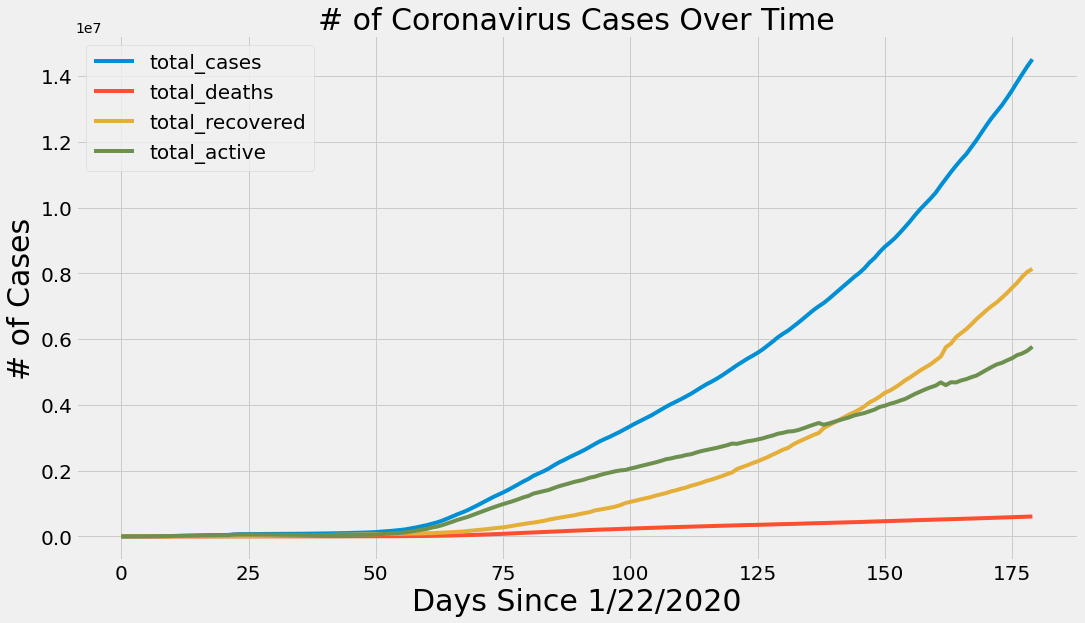

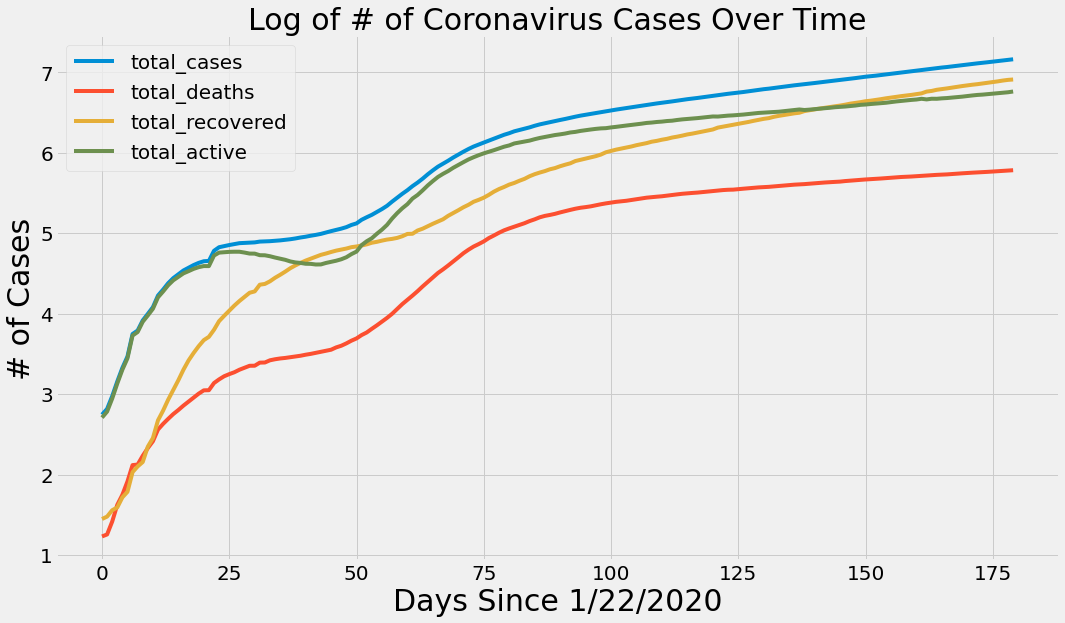

In [ ]:
#Insert your code here:


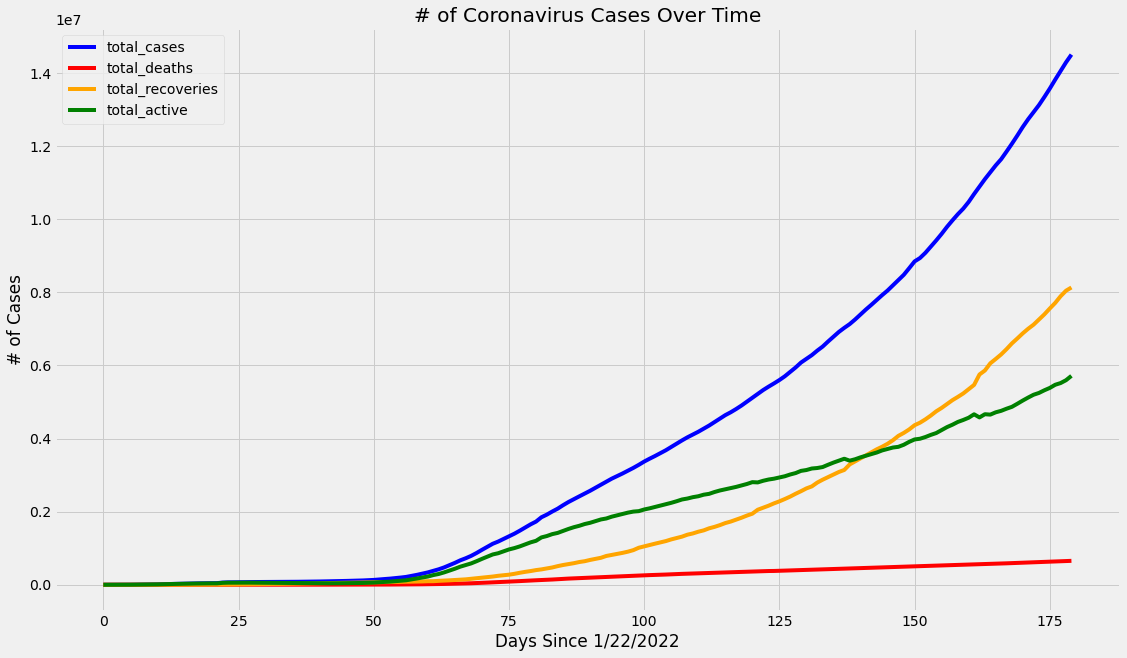

In [16]:
plt.figure(figsize = (17, 10))
plt.plot(adjusted_dates,total_cases, color ='blue', label="total_cases")
plt.plot(adjusted_dates,total_deaths,color="red",label="total_deaths")
plt.plot(adjusted_dates,total_recovered,color="orange",label="total_recoveries")
plt.plot(adjusted_dates,total_active,color = "green",label="total_active")
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("# of Coronavirus Cases Over Time")
plt.legend()
plt.show()

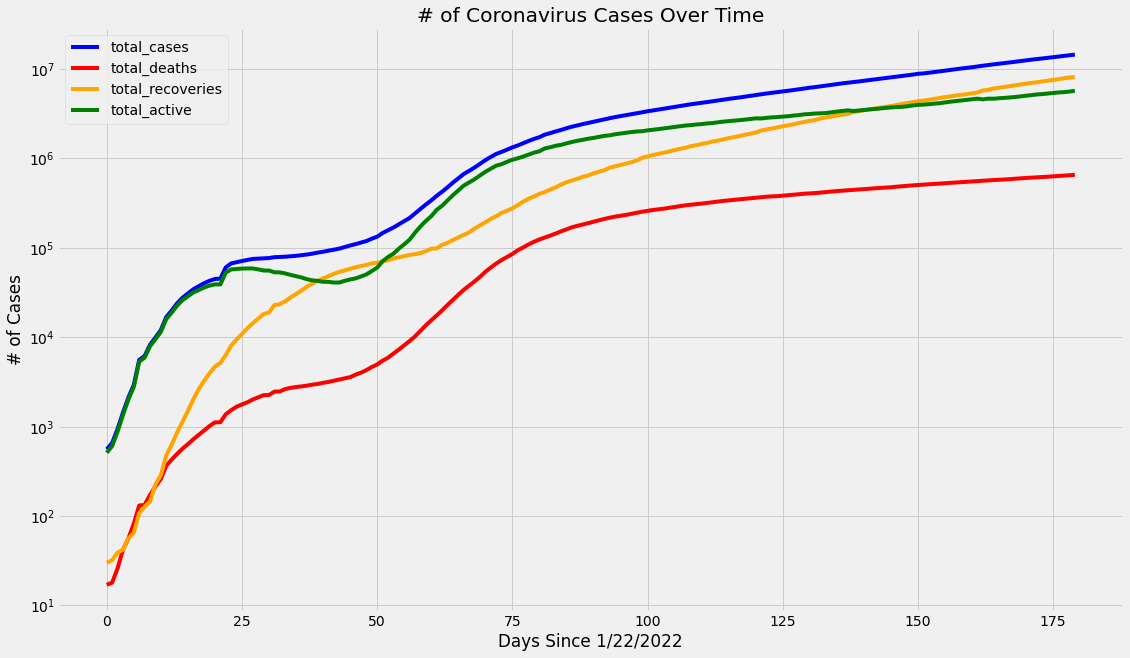

In [7]:
plt.figure(figsize = (17, 10))
plt.plot(adjusted_dates,total_cases, color ='blue',label="total_cases")
plt.plot(adjusted_dates,total_deaths,color="red",label="total_deaths")
plt.plot(adjusted_dates,total_recovered,color="orange",label="total_recoveries")
plt.plot(adjusted_dates,total_active,color = "green",label="total_active")
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("# of Coronavirus Cases Over Time")
plt.yscale("log")
plt.legend()
plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

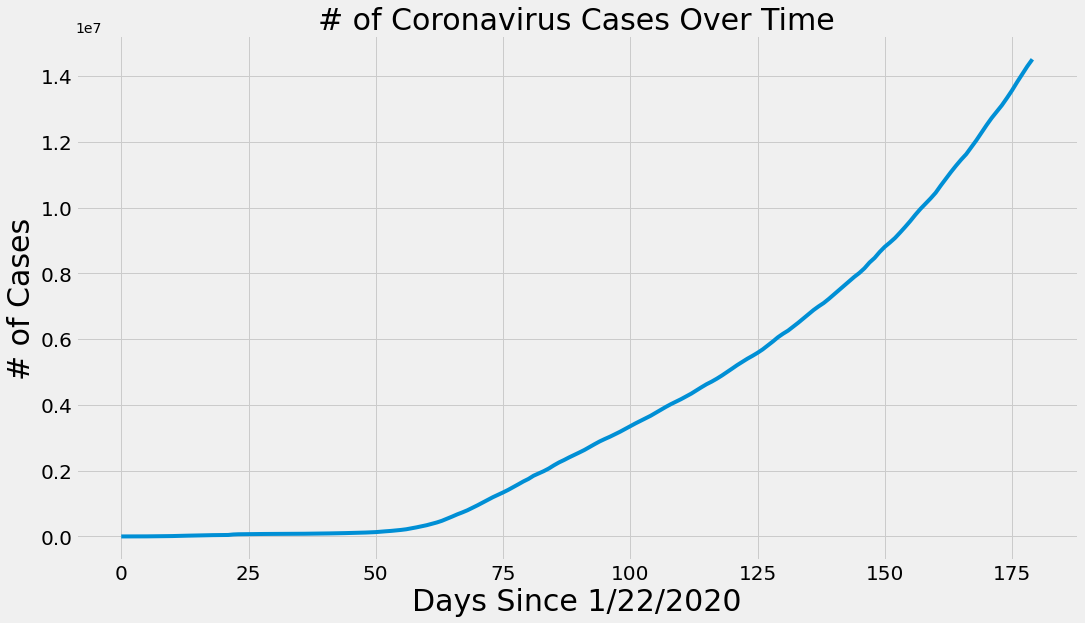

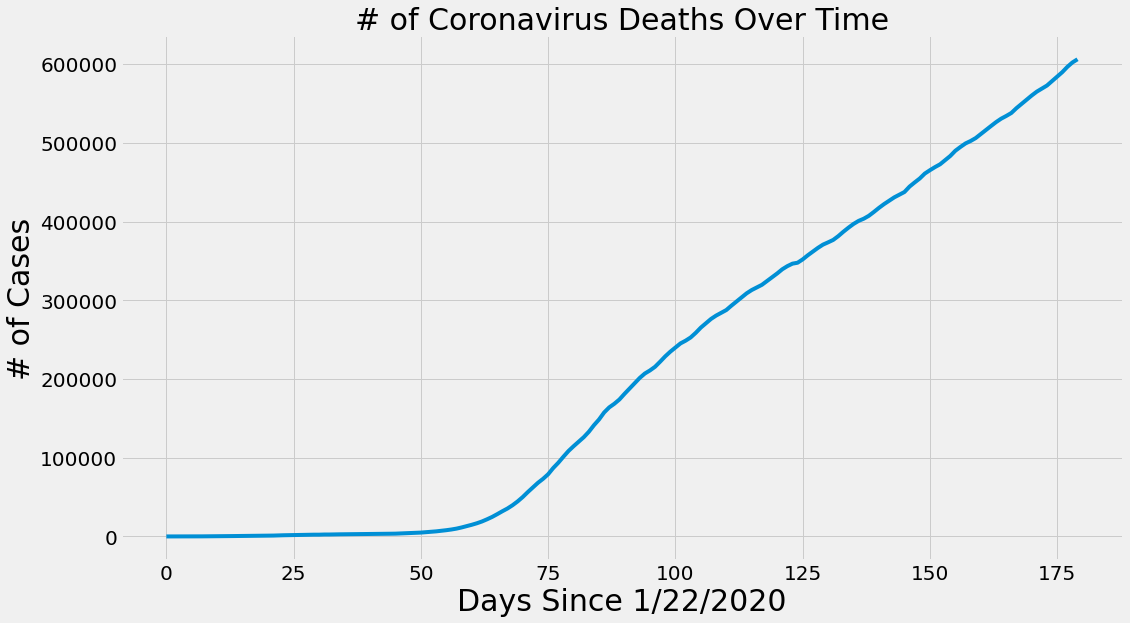

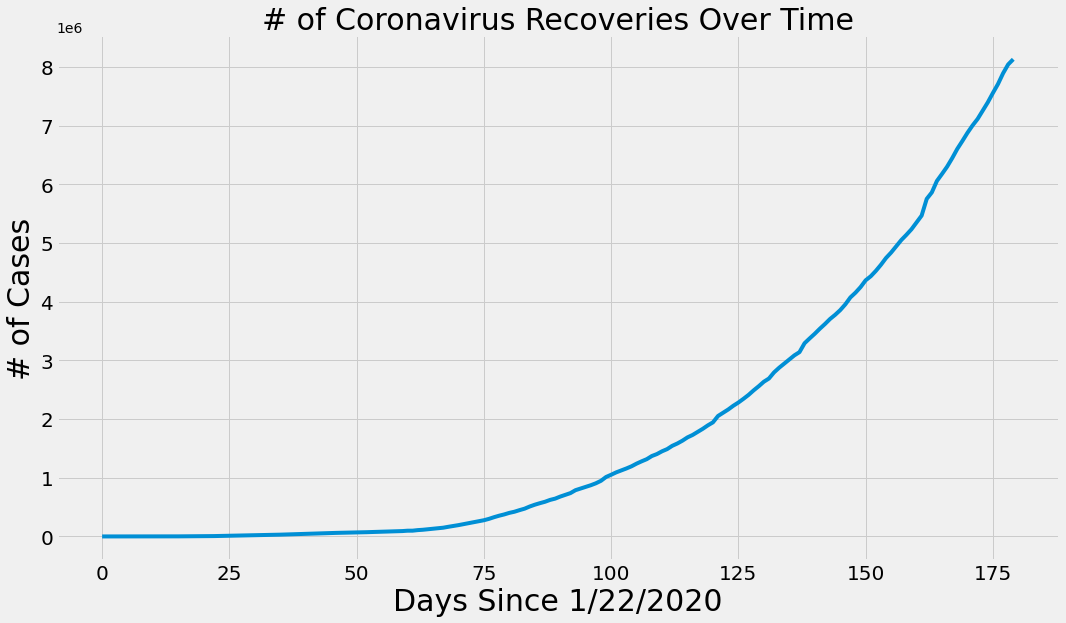

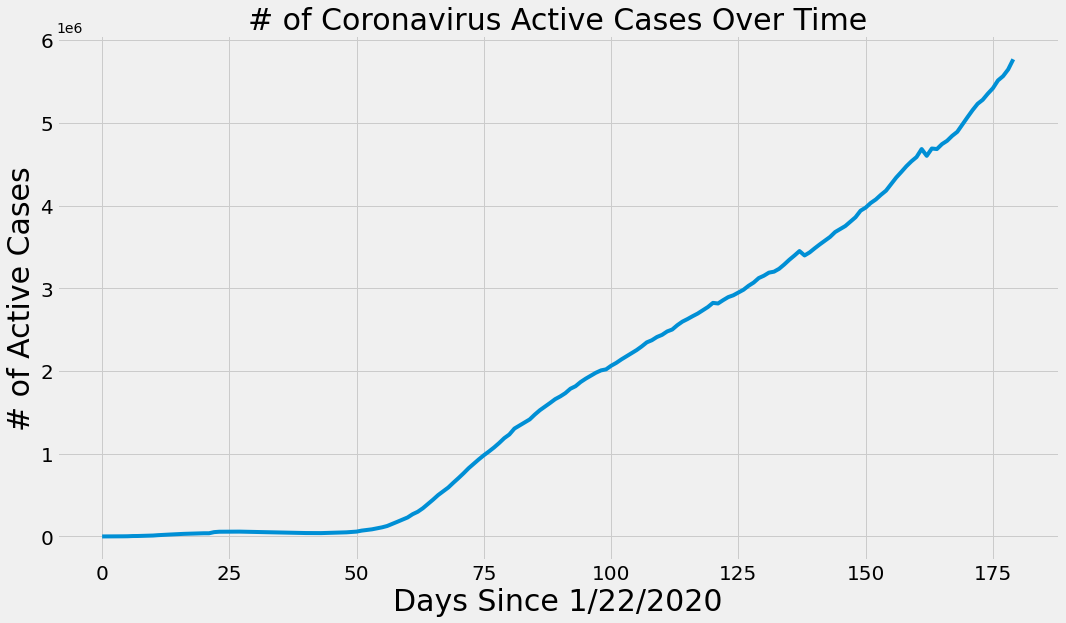

In [ ]:
#Insert your code here:


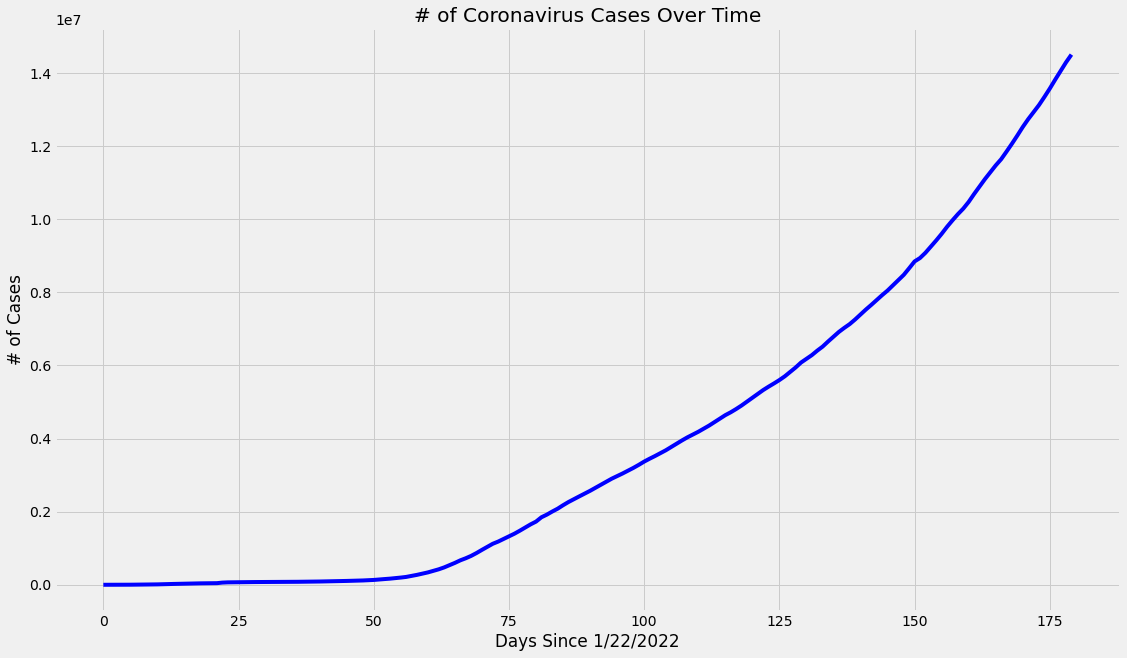

In [8]:
plt.figure(figsize = (17, 10))
plt.plot(adjusted_dates,total_cases, color ='blue')
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("# of Coronavirus Cases Over Time")
plt.show()

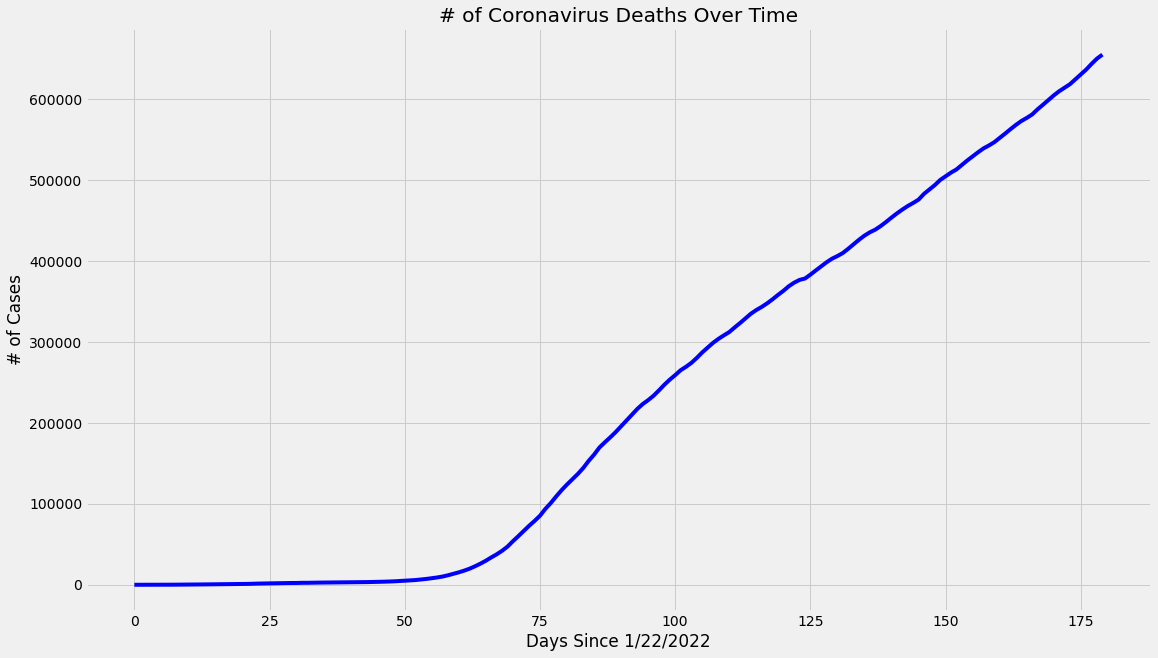

In [9]:
plt.figure(figsize = (17, 10))
plt.plot(adjusted_dates,total_deaths, color ='blue')
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("# of Coronavirus Deaths Over Time")
plt.show()

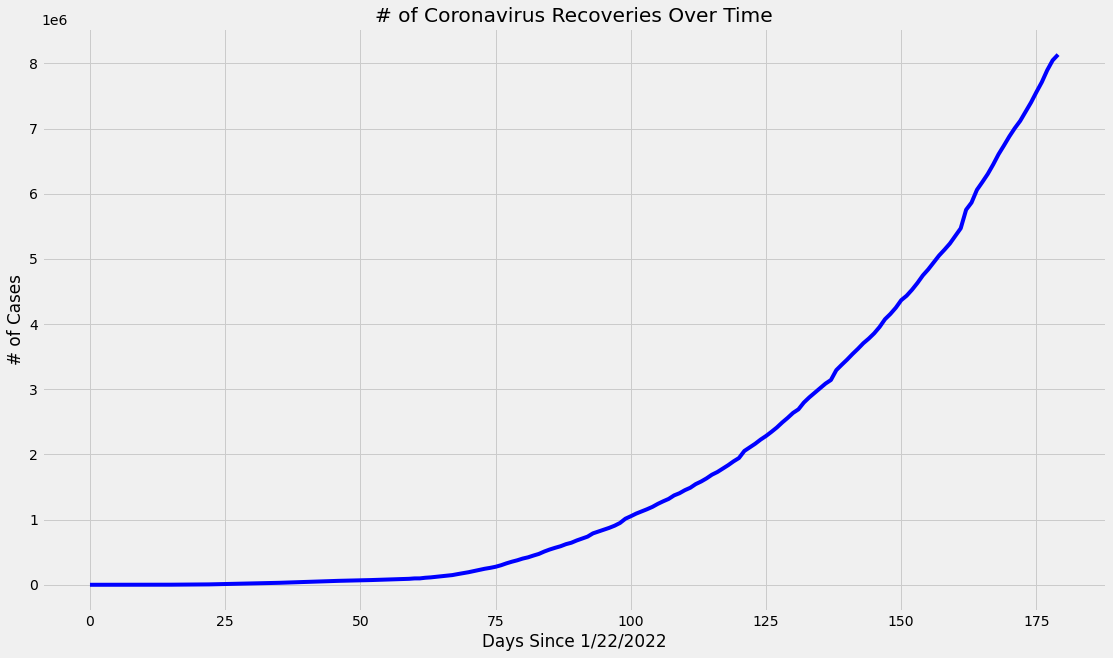

In [10]:
plt.figure(figsize = (17, 10))
plt.plot(adjusted_dates,total_recovered, color ='blue')
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("# of Coronavirus Recoveries Over Time")
plt.show()

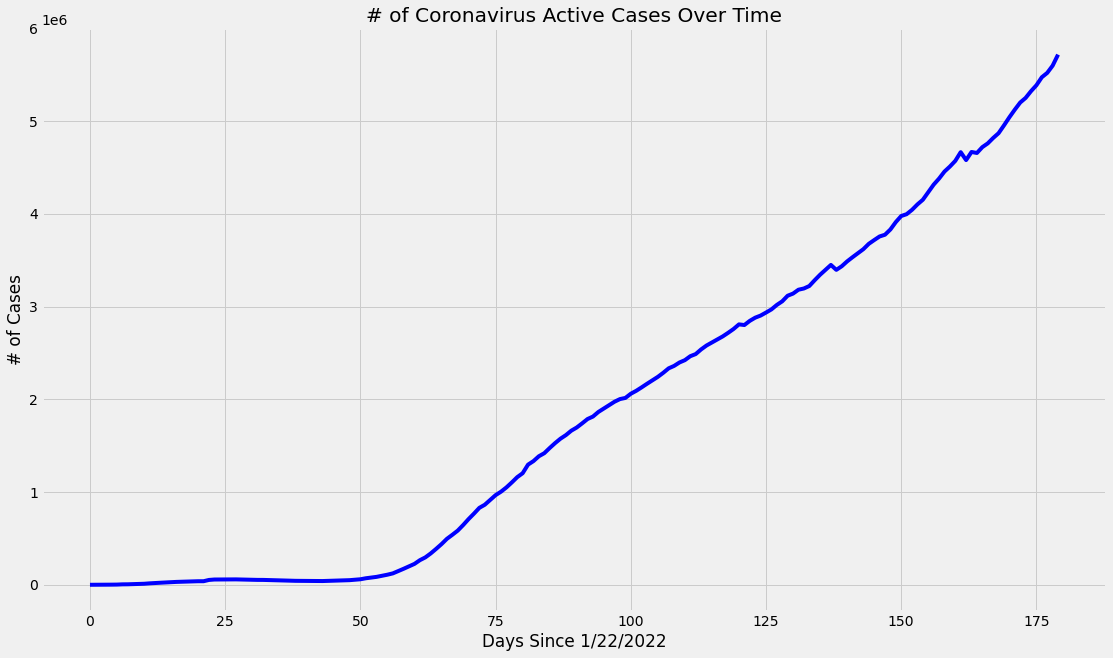

In [11]:
plt.figure(figsize = (17, 10))
plt.plot(adjusted_dates,total_active, color ='blue')
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("# of Coronavirus Active Cases Over Time")
plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [12]:
#Insert your code here:
increase_confirm= []
increase_death = []
increase_recovery = []
increase_active = []
for i in range(1,len(total_cases)):
    increase_confirm.append(total_cases[i]-total_cases[i-1])
    increase_death.append(total_deaths[i]-total_deaths[i-1])
    increase_recovery.append(total_recovered[i]-total_recovered[i-1])
    increase_active.append(total_active[i]-total_active[i-1])

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

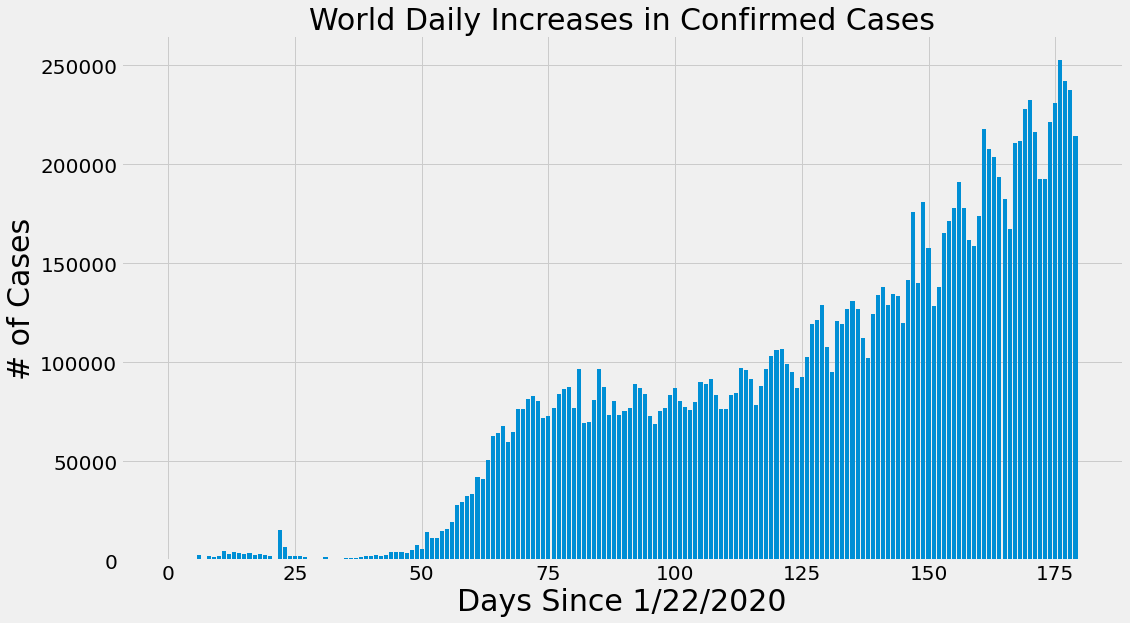

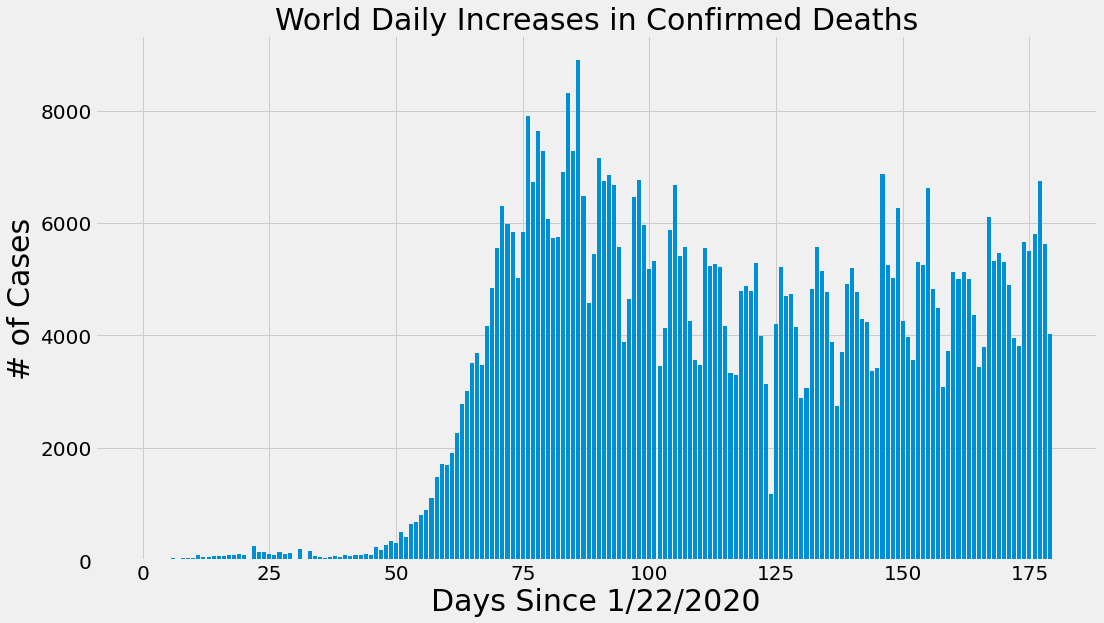

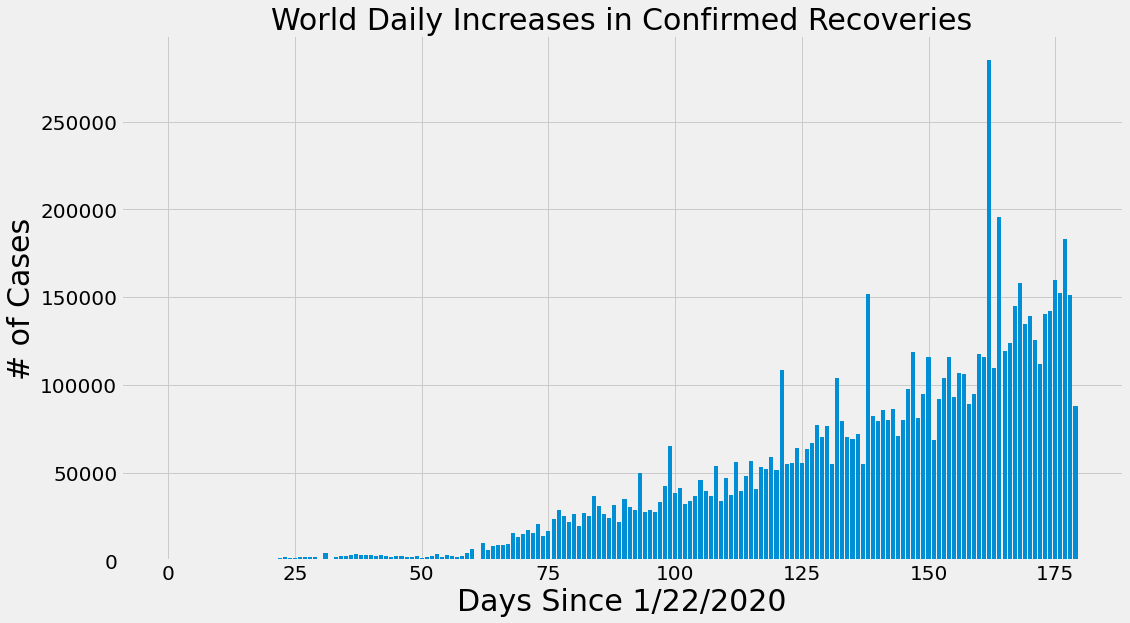

In [ ]:
#Insert your code here:


In [13]:
adjusted_dates = adjusted_dates[1:]
len(adjusted_dates)

179

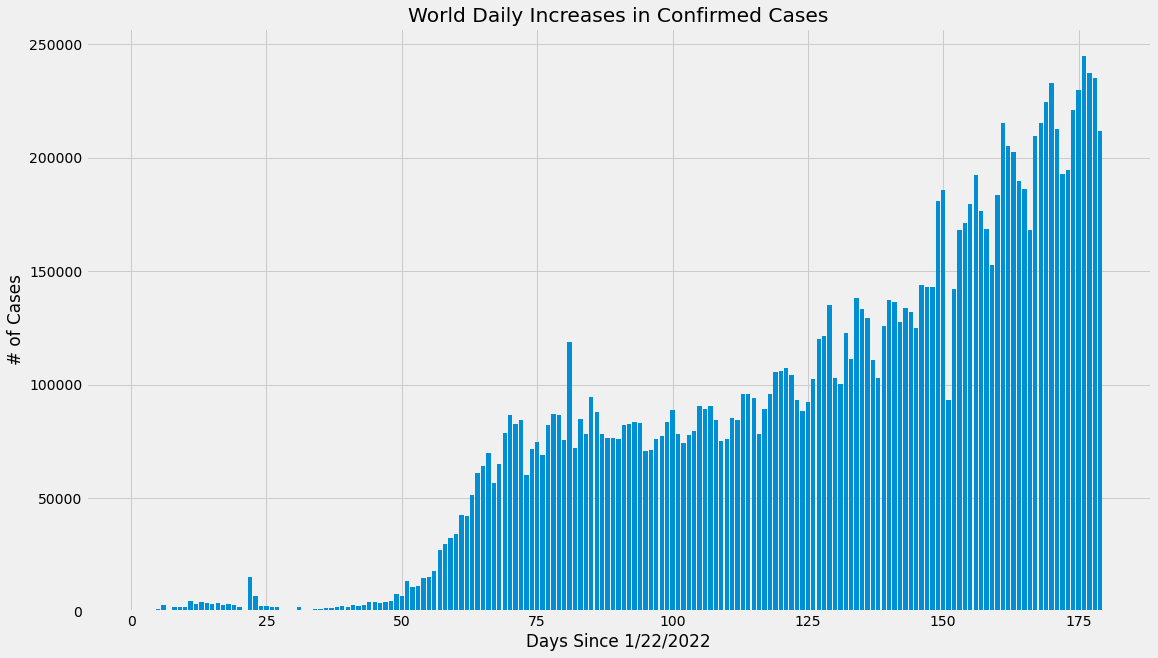

In [14]:
plt.figure(figsize = (17, 10))
plt.bar(adjusted_dates,increase_confirm)
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("World Daily Increases in Confirmed Cases")
plt.show()


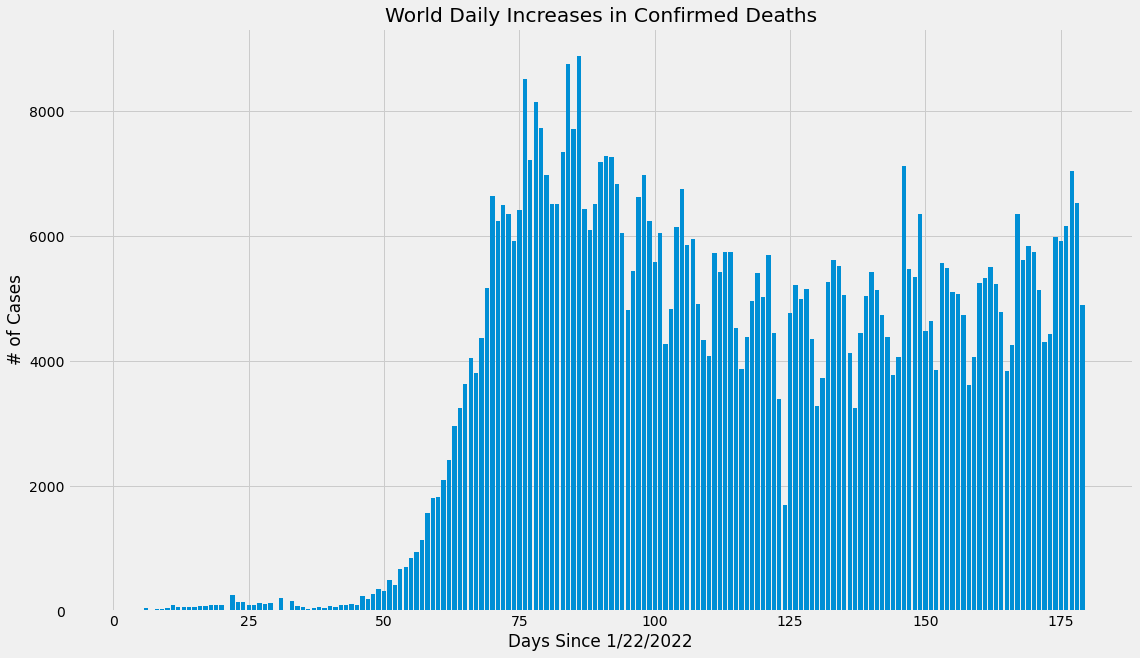

In [15]:
plt.figure(figsize = (17, 10))
plt.bar(adjusted_dates,increase_death)
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("World Daily Increases in Confirmed Deaths")
plt.show()

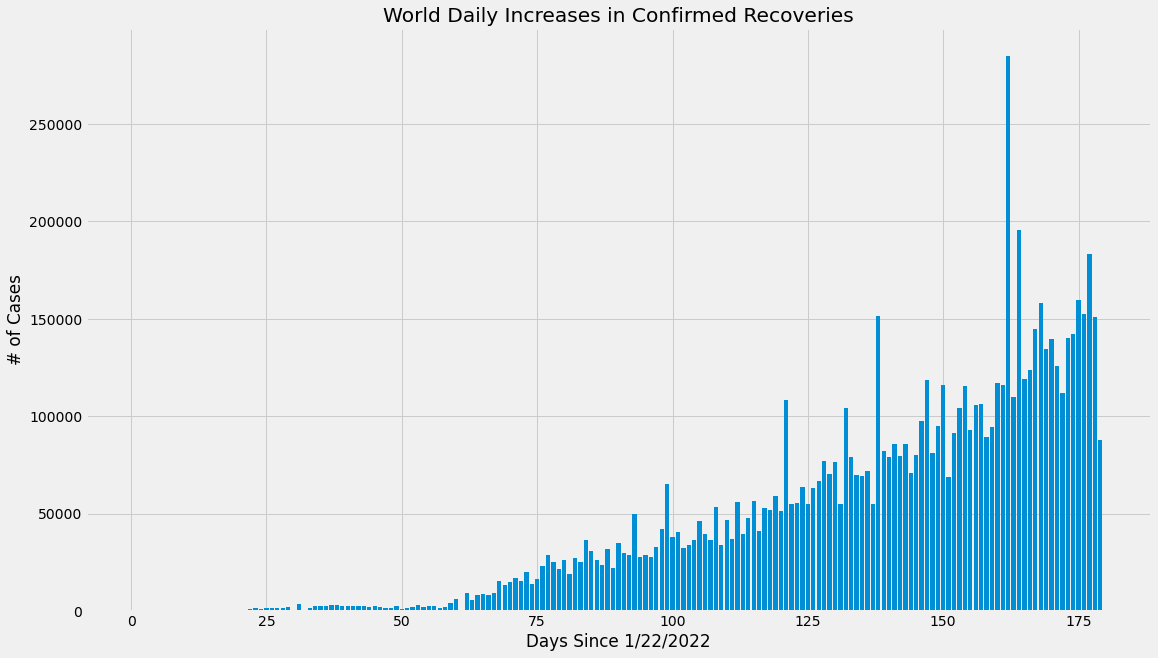

In [16]:
plt.figure(figsize = (17, 10))
plt.bar(adjusted_dates,increase_recovery)
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("World Daily Increases in Confirmed Recoveries")
plt.show()

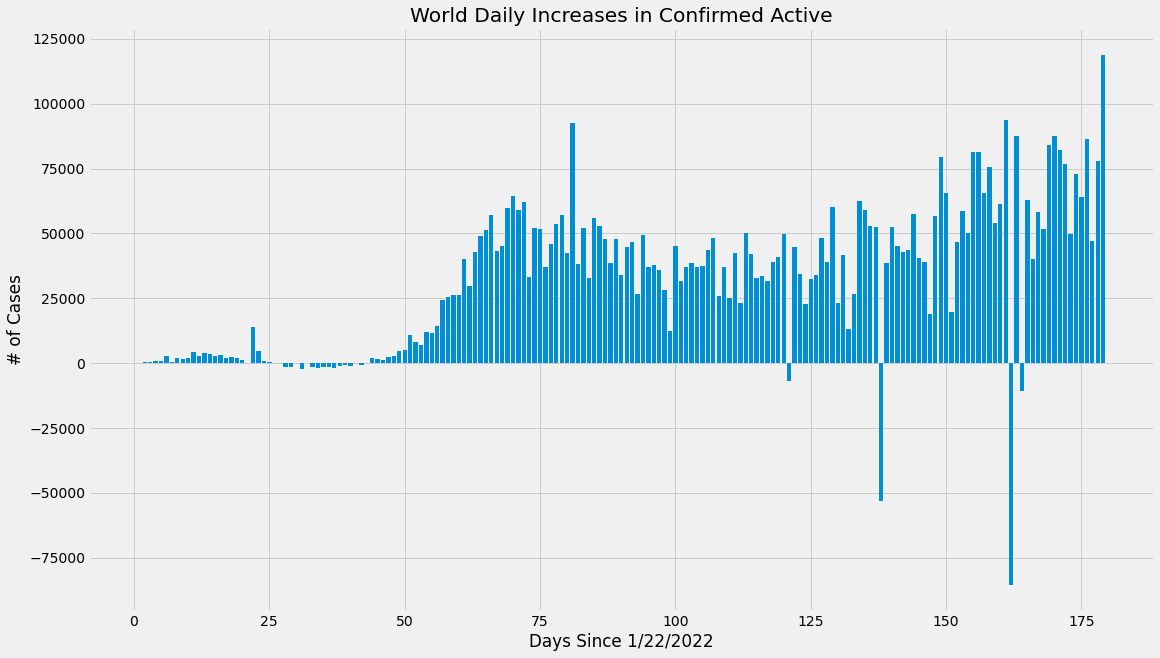

In [17]:
plt.figure(figsize = (17, 10))
plt.bar(adjusted_dates,increase_active)
plt.xlabel("Days Since 1/22/2022"),
plt.ylabel("# of Cases")
plt.title("World Daily Increases in Confirmed Active")
plt.show()

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [20]:
#Insert your code here:
total_cases = confirmed.sum(axis=0)
total_deaths = deaths.sum(axis=0)
total_recovered = recoveries.sum(axis=0)

mortality_rate = (total_deaths / total_cases) * 100
recovery_rate = (total_recovered / total_cases) * 100

In [28]:
mortality_rate

1/22/20    3.052065
1/23/20    2.739726
1/24/20    2.754237
1/25/20    2.922756
1/26/20    2.641509
             ...   
7/15/20    4.644407
7/16/20    4.606690
7/17/20    4.578953
7/18/20    4.549246
7/19/20    4.516531
Length: 180, dtype: float64

In [29]:
recovery_rate

1/22/20     5.385996
1/23/20     4.870624
1/24/20     4.131356
1/25/20     2.922756
1/26/20     2.641509
             ...    
7/15/20    55.681303
7/16/20    55.797903
7/17/20    56.160298
7/18/20    56.290559
7/19/20    56.075351
Length: 180, dtype: float64

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

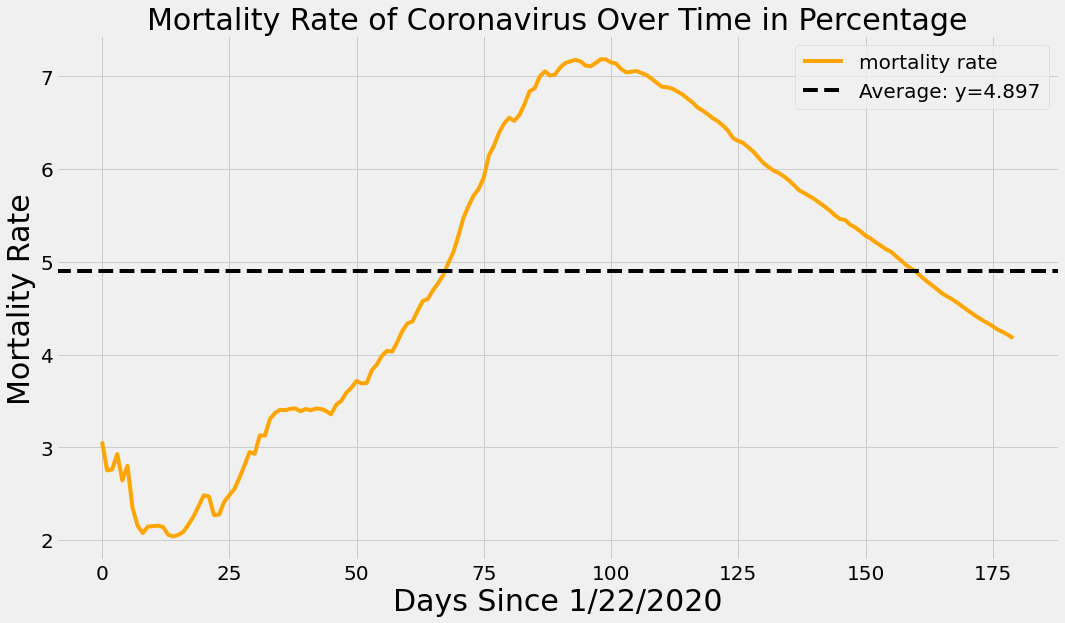

In [ ]:
#Insert your code here:


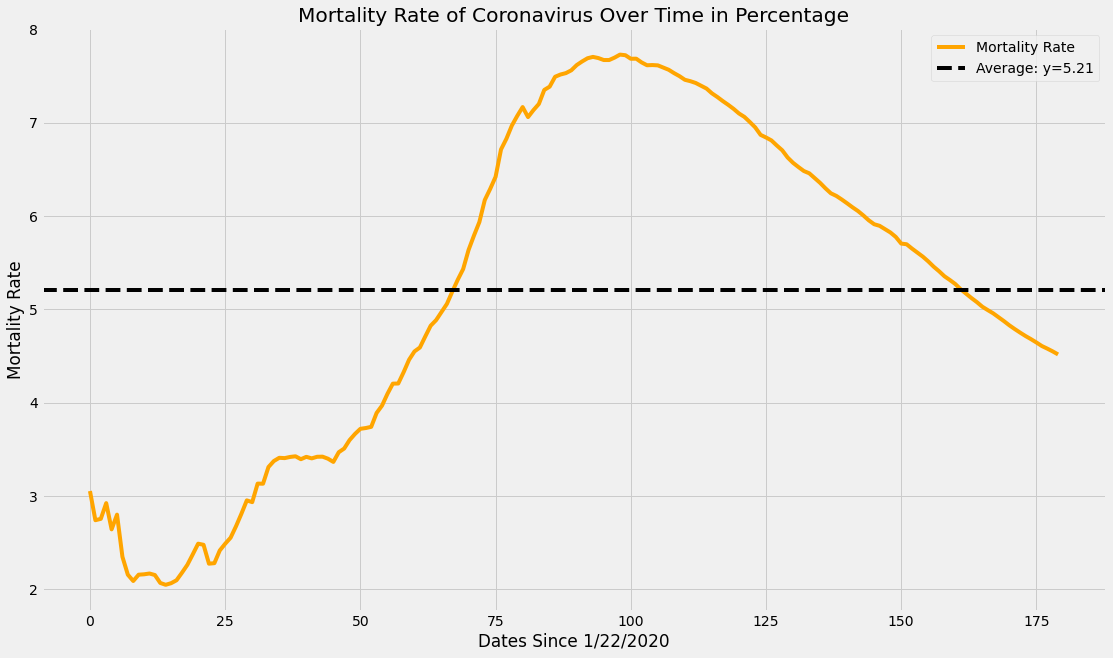

In [34]:
avg_mortality_rate = round(mortality_rate.mean(),2)
plt.figure(figsize=(17, 10))
plt.plot(adjusted_dates,mortality_rate,color ='orange', label='Mortality Rate')
plt.axhline(y=avg_mortality_rate, color='black', linestyle='--', label ="Average: y="+ str(avg_mortality_rate))
plt.title('Mortality Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Dates Since 1/22/2020')
plt.ylabel('Mortality Rate')
plt.legend()
plt.show()

**7.2** 

    Visualize the recovery rate in by time (day units) using the line chart.

    Using the dashline to visualize the average recovery rate of all the time.

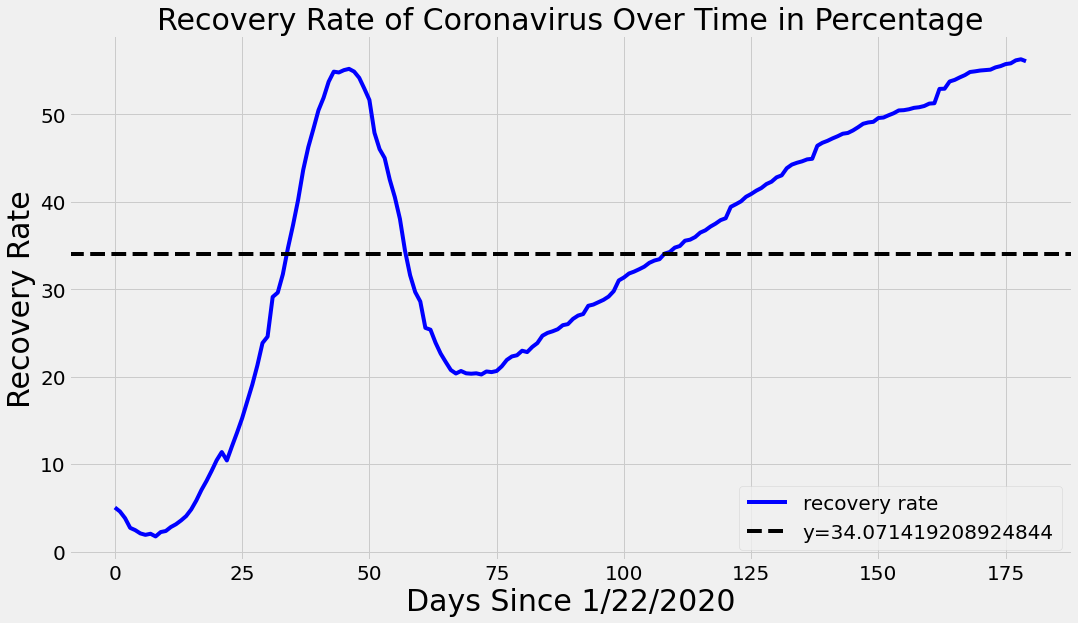

In [ ]:
#Insert your code here:


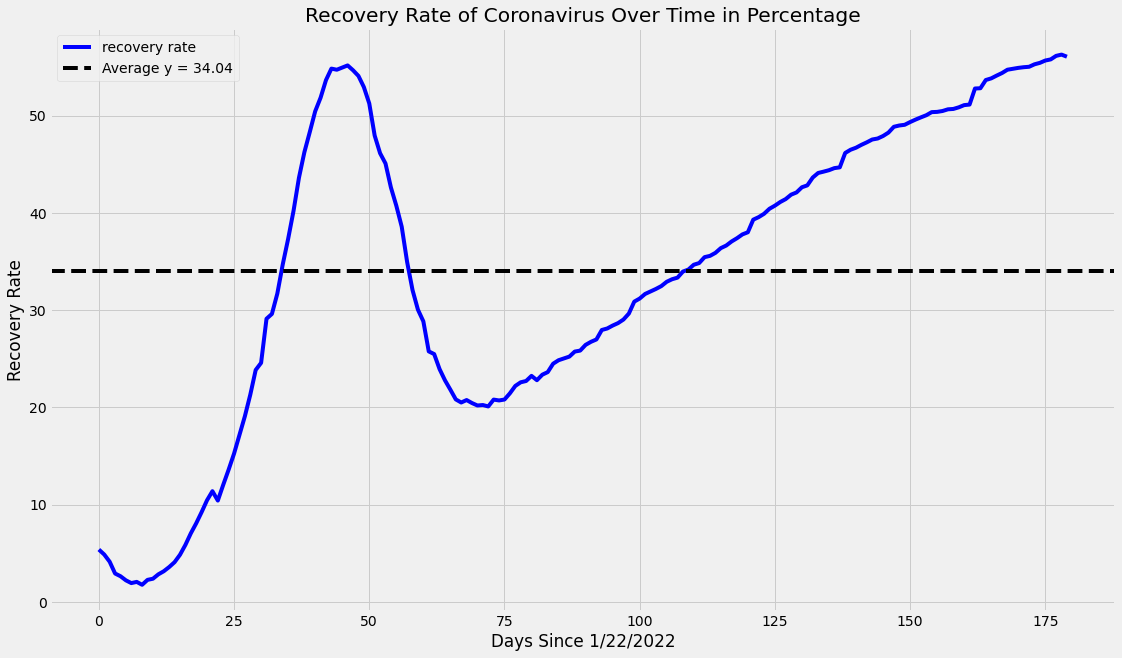

In [36]:
avg_recovery_rate = round(recovery_rate.mean(),2)
plt.figure(figsize = (17, 10))
plt.plot(adjusted_dates,percent_recovered, color ='blue',label= "recovery rate")
plt.axhline(y=np.average(percent_recovered),color = "black",linestyle="dashed",label="Average y = "+str(avg_recovery_rate))
plt.xlabel("Days Since 1/22/2022")
plt.ylabel("Recovery Rate")
plt.title("Recovery Rate of Coronavirus Over Time in Percentage")
plt.legend()
plt.show()

#  5. Continent Analysis

## Data Prerocessing

In [7]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"


confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [ ]:
#Insert your code here:


Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...    34194    34366    34451   
1        0        0        0        0  ...     3278     3371     3454   
2        0        0        0        0  ...    18242    18712    19195   
3        0        0        0        0  ...      855      855      855   
4        0        0        0        0  ...      458      462      506   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0    34455    34740    34994    35070    35229    35301    35475  
1     3571     3667     3752     3851     3906     4008     4090  
2    19689    20216    20770    21355    21948    22549    23084  
3      858      861      862      877      880      880      880  
4      525      541      576      607      638      687      705  

[5 rows x 185 columns]

In [8]:
def continent_code_to_list(countries):
    temp_list = []
    for i in range(len(countries)):
        temp_list.append(continents[country_to_continent_code(countries[i])])
    return temp_list
                         
confirmed_df.insert(2, "continent", continent_code_to_list(countries), True)
deaths_df.insert(2, "continent", continent_code_to_list(countries1), True)
recoveries_df.insert(2, "continent", continent_code_to_list(countries2), True)


In [9]:
recoveries_df

Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      Asia  33.939110   67.709953   
1              NaN               Albania    Europe  41.153300   20.168300   
2              NaN               Algeria    Africa  28.033900    1.659600   
3              NaN               Andorra    Europe  42.506300    1.521800   
4              NaN                Angola    Africa -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
269            NaN    West Bank and Gaza    Others  31.952200   35.233200   
270            NaN  Winter Olympics 2022    Others  39.904200  116.407400   
271            NaN                 Yemen      Asia  15.552727   48.516388   
272            NaN                Zambia    Africa -13.133897   27.849332   
273            NaN              Zimbabwe    Africa -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/10/20  7/11/20  \
0          0        0        0        0        0  ...    20882    21135   
1          0        0        0        0        0  ...     1875     1881   
2          0        0        0        0        0  ...    13124    13124   
3          0        0        0        0        0  ...      803      803   
4          0        0        0        0        0  ...      117      118   
..       ...      ...      ...      ...      ...  ...      ...      ...   
269        0        0        0        0        0  ...      536      536   
270        0        0        0        0        0  ...        0        0   
271        0        0        0        0        0  ...      630      642   
272        0        0        0        0        0  ...     1348     1348   
273        0        0        0        0        0  ...      320      320   

     7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0      21216    21254    21454    22456    22824    23151    23273    23634  
1       1946     2014     2062     2091     2137     2214     2264     2311  
2      13743    14019    14295    14792    15107    15430    15744    16051  
3        803      803      803      803      803      803      803      803  
4        118      118      118      124      124      199      210      221  
..       ...      ...      ...      ...      ...      ...      ...      ...  
269      942     1084     1084     1084     1313     1492     1596     1921  
270        0        0        0        0        0        0        0        0  
271      659      675      685      694      695      695      701      712  
272     1412     1412     1412     1412     1412     1450     1462     1462  
273      328      343      343      395      425      438      439      472  

[274 rows x 185 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [ ]:
#Insert your code here:


Lat       Long continent  Confirmed  Deaths  Recoveries  \
Country/Region                                                                 
Afghanistan     33.93911  67.709953      Asia      35475    1181       23634   
Albania         41.15330  20.168300    Europe       4090     112        2311   
Algeria         28.03390   1.659600    Africa      23084    1078       16051   
Andorra         42.50630   1.521800    Europe        880      52         803   
Angola         -11.20270  17.873900    Africa        705      29         221   

                Active  Mortality Rate  
Country/Region                          
Afghanistan      10660            3.33  
Albania           1667            2.74  
Algeria           5955            4.67  
Andorra             25            5.91  
Angola             455            4.11

In [10]:
countries_df = pd.DataFrame(index = confirmed_df["Country/Region"])
countries_df["Lat"] = confirmed_df["Lat"].values
countries_df["Long"] = confirmed_df["Long"].values
countries_df["continent"] = confirmed_df["continent"].values
countries_df["Confirmed"] = confirmed_df[dates[-1]].values
countries_df["Deaths"] = deaths_df[dates[-1]].values
countries_df["Recoveries"] = recoveries[dates[-1]].values
countries_df["Active"] = (confirmed_df[dates[-1]] - deaths_df[dates[-1]] - recoveries_df[dates[-1]]).values

def calculate_mortality_rate(deaths, confirmed):
    temp_list = np.array([])
    for i in range(len(confirmed_df["Lat"])):
        if confirmed[dates[-1]].iloc[i] > 0:
            temp_list = np.append(temp_list, deaths[dates[-1]].iloc[i] / confirmed[dates[-1]].iloc[i] * 100)
        else:
            temp_list = np.append(temp_list, 0)
    return np.around(temp_list, 2)

countries_df["Mortality Rate"] = calculate_mortality_rate(deaths_df, confirmed_df).tolist()

In [11]:
countries_df.head()

Lat       Long continent  Confirmed  Deaths  Recoveries  \
Country/Region                                                                 
Afghanistan     33.93911  67.709953      Asia      35561    1185       23634   
Albania         41.15330  20.168300    Europe       4090     112        2311   
Algeria         28.03390   1.659600    Africa      23084    1078       16051   
Andorra         42.50630   1.521800    Europe        880      52         803   
Angola         -11.20270  17.873900    Africa        705      29         221   

                Active  Mortality Rate  
Country/Region                          
Afghanistan      10742            3.33  
Albania           1667            2.74  
Algeria           5955            4.67  
Andorra             25            5.91  
Angola             455            4.11

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [ ]:
#Insert your code here:


Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
Africa            721282   15169      380245   325868            2.10
Asia             3392906   79888     2411011   902007            2.35
Australia          13666     145        9927     3594            1.06
Europe           2660158  199052     1535157   925949            7.48
North America    4445519  193846     1584688  2666985            4.36

In [12]:
Confirmed = confirmed_df.groupby("continent").sum()["7/19/20"]
continent_df = Confirmed.to_frame().reset_index().rename(columns={"7/19/20":"Confirmed"})
Deaths = deaths_df.groupby("continent").sum()["7/19/20"]
Deaths_new = Deaths.to_frame().reset_index().rename(columns={"7/19/20":"Deaths"})
Recoveries = recoveries_df.groupby("continent").sum()["7/19/20"]
Recoveries_new = Recoveries.to_frame().reset_index().rename(columns={"7/19/20":"Recoveries"})
Mortality_Rate= deaths_df.groupby("continent").sum()["7/19/20"]/confirmed_df.groupby("continent").sum()["7/19/20"]*100
Mortality_new = Mortality_Rate.to_frame().reset_index().rename(columns={"7/19/20":"Mortality Rate"})
continent_df["Deaths"] = Deaths_new["Deaths"]
continent_df["Recoveries"] = Recoveries_new["Recoveries"]
continent_df["Active"] = continent_df["Confirmed"] - continent_df["Deaths"] - continent_df["Recoveries"]
continent_df["Mortality Rate"] = Mortality_new["Mortality Rate"].round(2)
continent_df


continent  Confirmed  Deaths  Recoveries   Active  Mortality Rate
0         Africa     721049   15169      380245   325635            2.10
1           Asia    3396986   80203     2411307   905476            2.36
2      Australia      13666     146        9927     3593            1.07
3         Europe    2658403  210700     1535087   912616            7.93
4  North America    4438206  194513     1584688  2659005            4.38
5         Others      15382     218        5852     9312            1.42
6  South America    3261578  154186     2206775   900617            4.73

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [13]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

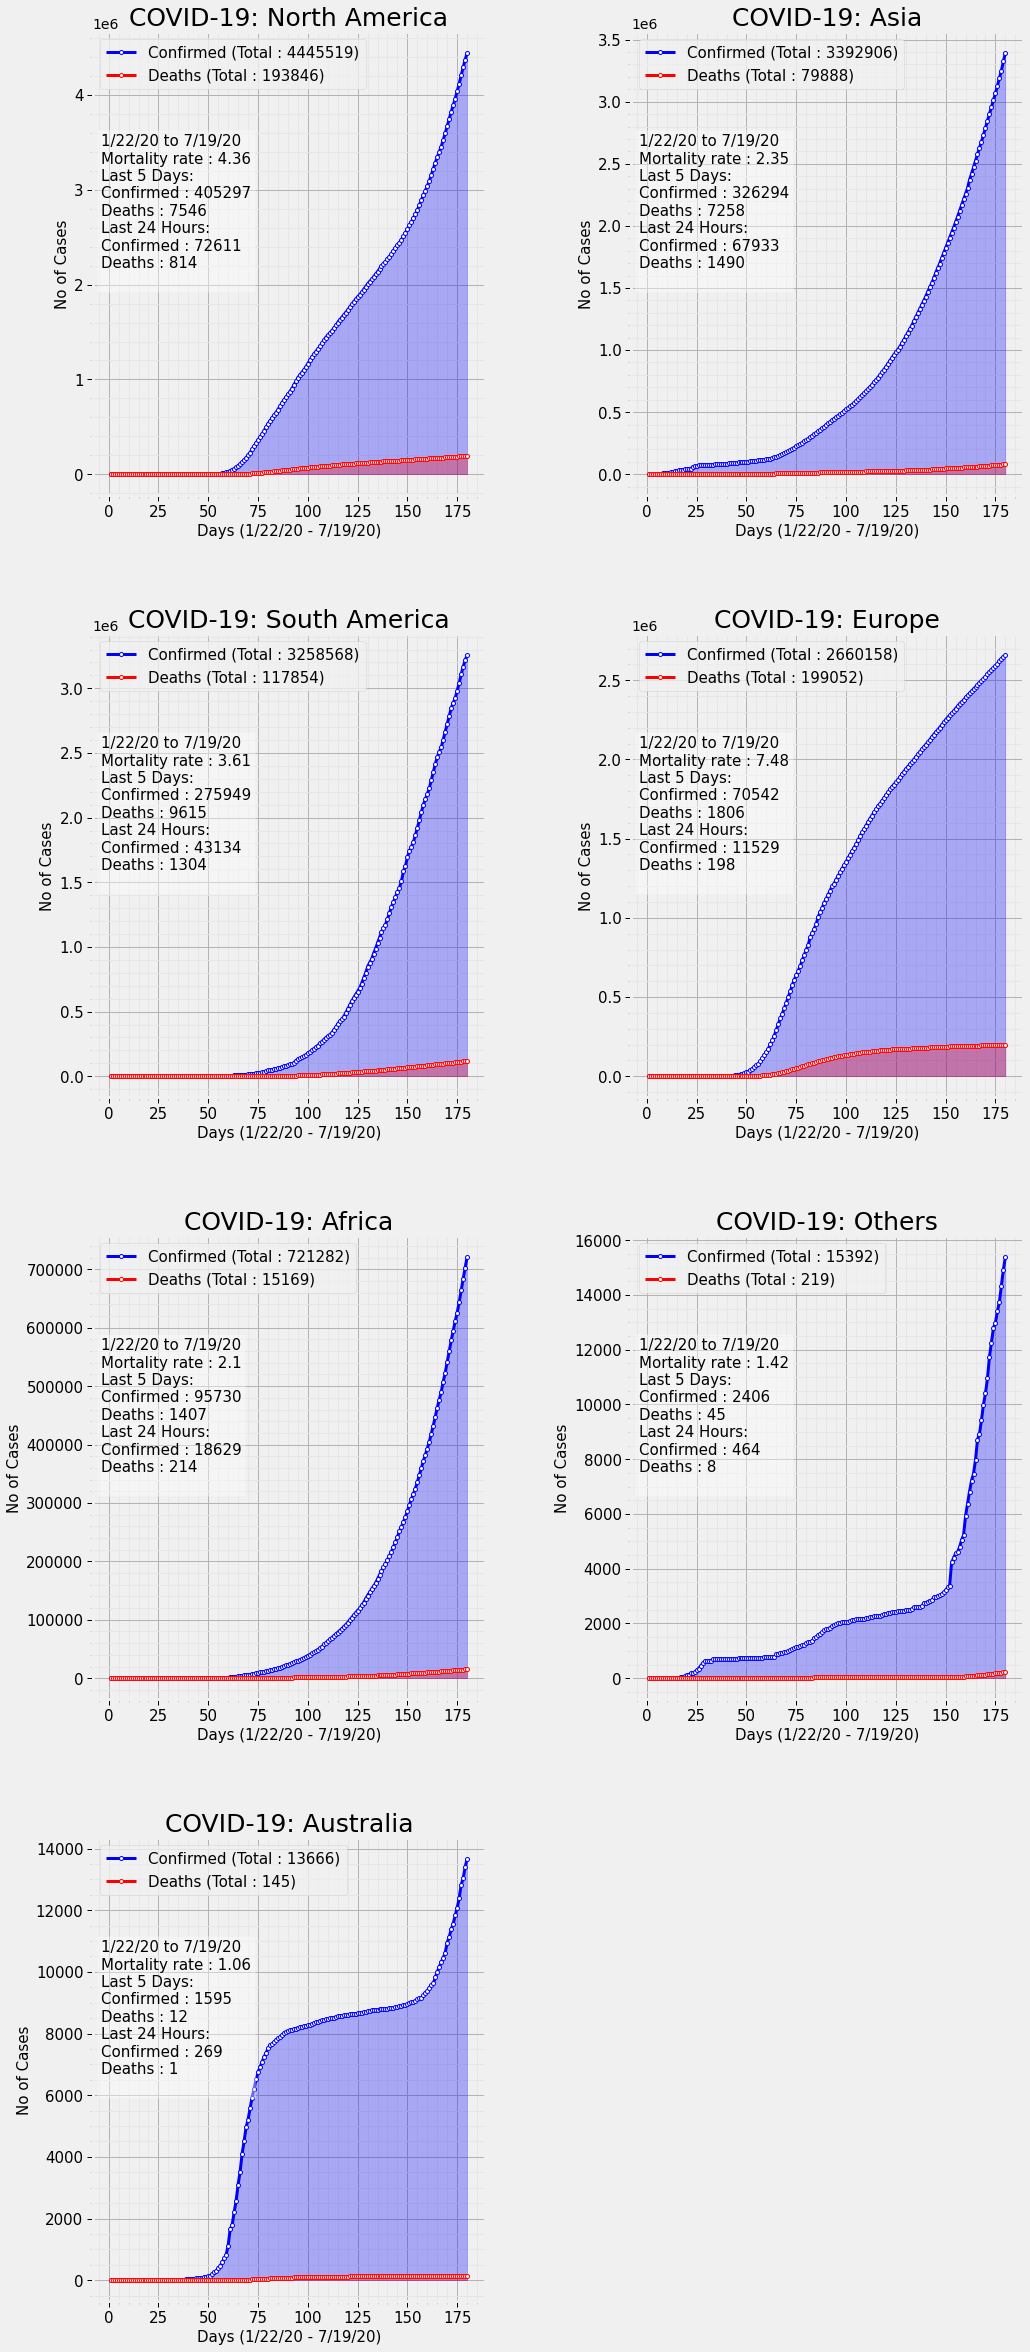

In [ ]:
#Insert your code here:


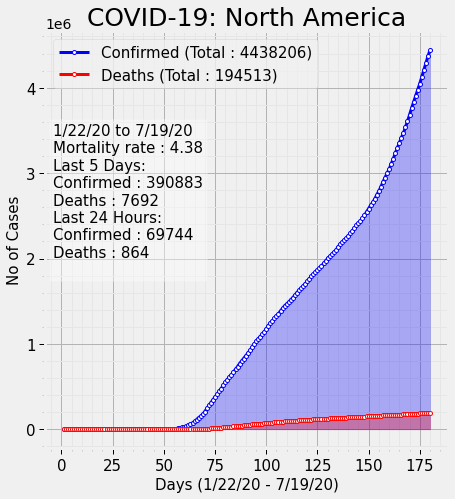

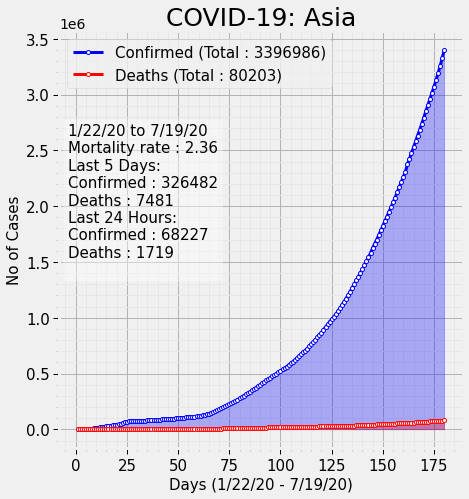

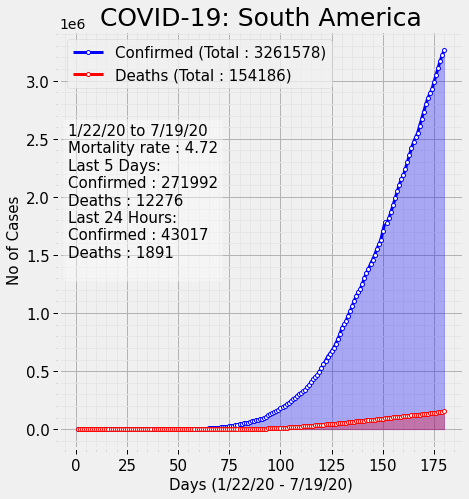

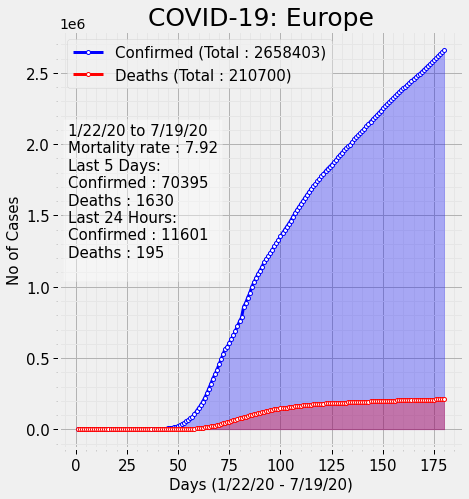

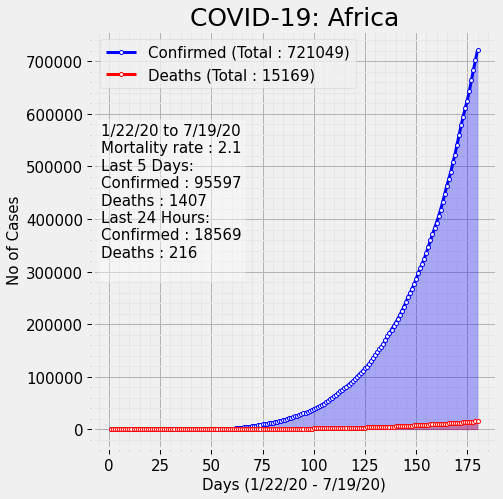

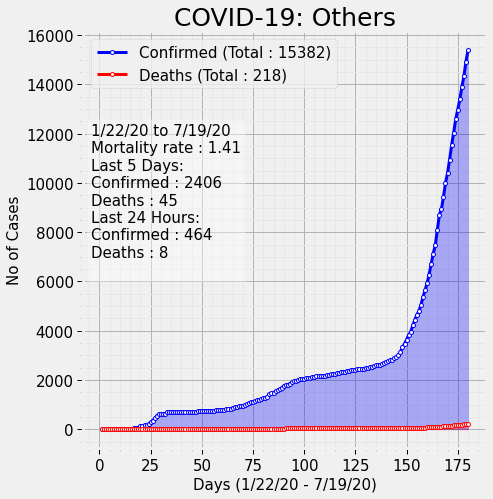

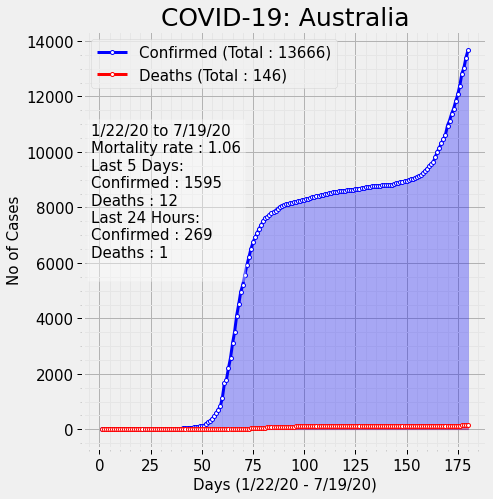

In [16]:
def sort_confirmed_cases(df):
    continents = ['North America', 'South America', 'Asia', 'Australia', 'Africa', 'Europe', 'Others']
    temp_list = []
    for i in range(len(continents)):
        continent_df = confirmed_df.loc[confirmed_df["continent"]==continents[i]]
        columns = dates[-1]
        temp_list.append([continent_df[columns].sum(), continents[i]])
    temp_list.sort(key=lambda x:x[0], reverse = True)
    return temp_list

def input_visualize_covid_cases(continent: list):
    for i in range(len(continent)):
        visualize_covid_cases(confirmed_df, deaths_df, continent[i][1])
        
input_visualize_covid_cases(sort_confirmed_cases(confirmed_df))


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

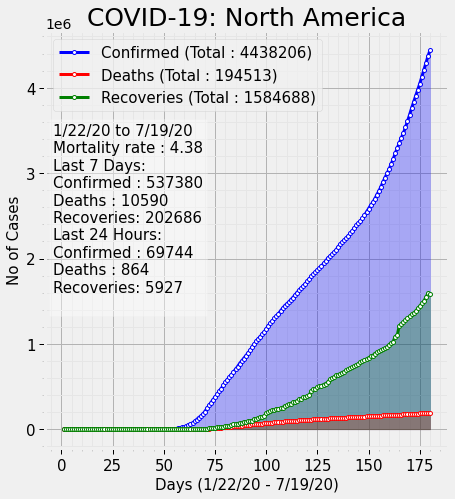

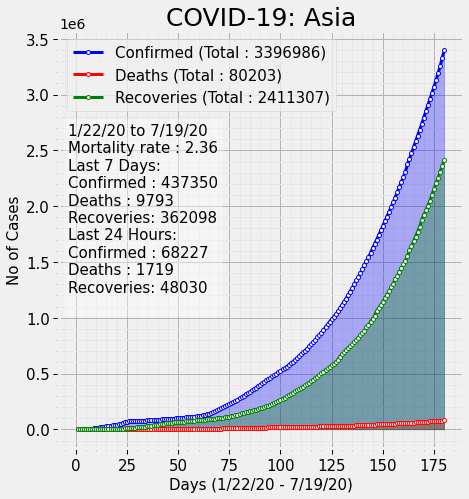

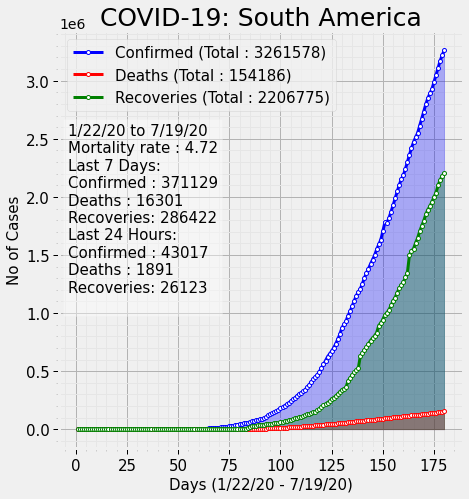

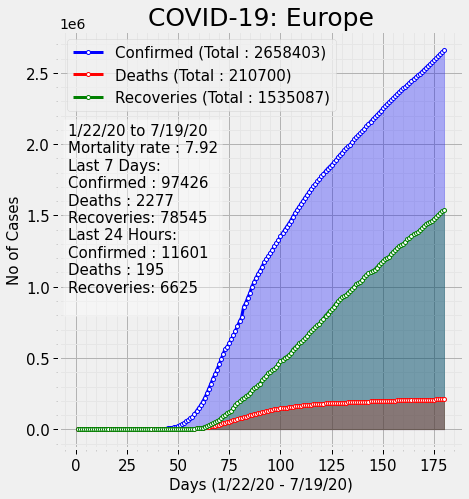

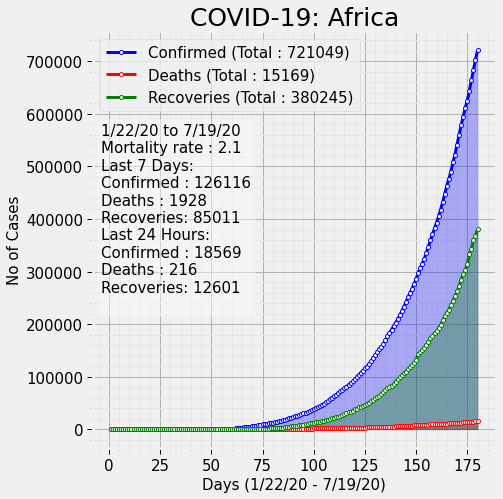

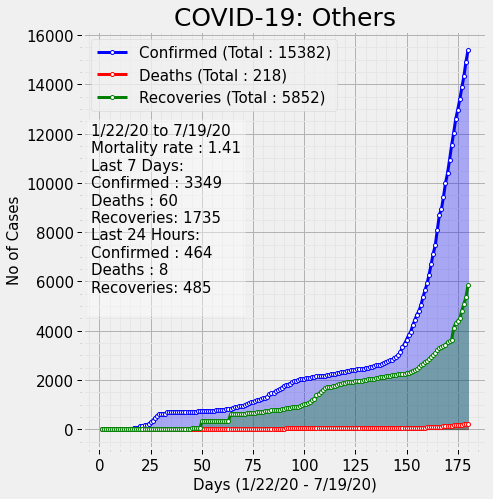

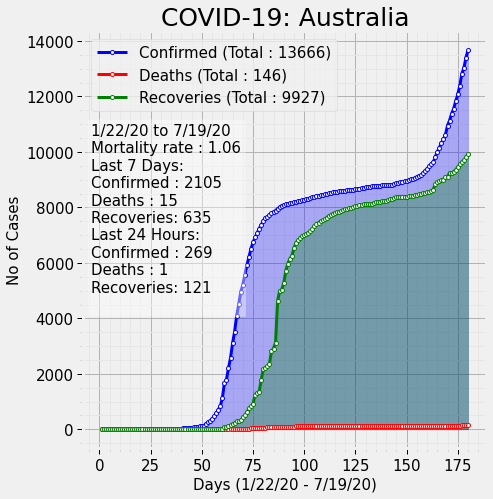

In [18]:
#Insert your code here:
def modified_plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def modified_visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries_df]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["Country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(abs(Total_confirmed[-1] - Total_confirmed[-8]))+"\n"
    text += "Deaths : " + str(abs(Total_deaths[-1] - Total_deaths[-8]))+"\n"
    text += "Recoveries: " + str(abs(Total_recoveries[-1] - Total_recoveries[-8]))+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(abs(Total_confirmed[-1] - Total_confirmed[-2]))+"\n"
    text += "Deaths : " + str(abs(Total_deaths[-1] - Total_deaths[-2]))+"\n"
    text += "Recoveries: " + str(abs(Total_recoveries[-1] - Total_recoveries[-2]))+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    modified_plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def input_modified_visualize_covid_cases(continent: list):
    for i in range(len(continent)):
        modified_visualize_covid_cases(confirmed_df, deaths_df, continent[i][1])
        
input_modified_visualize_covid_cases(sort_confirmed_cases(confirmed_df))

# Problem 12
    Visualize the covariance matrix for continents_df.

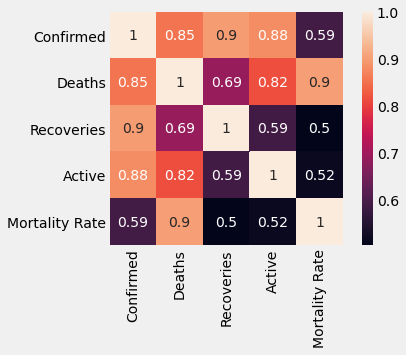

In [ ]:
#Insert your code here:

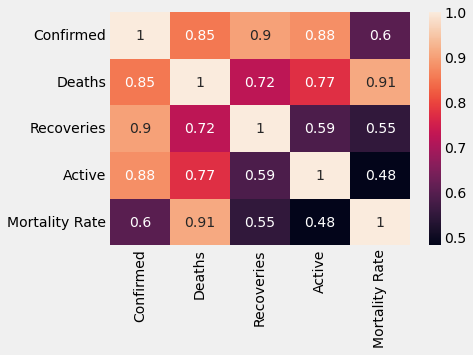

In [30]:
sns.heatmap(continent_df[["Confirmed", "Deaths", "Recoveries", "Active", "Mortality Rate"]].corr(), annot = True)
plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

/home/hana/hana/env37/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



<Figure size 1080x2880 with 0 Axes>

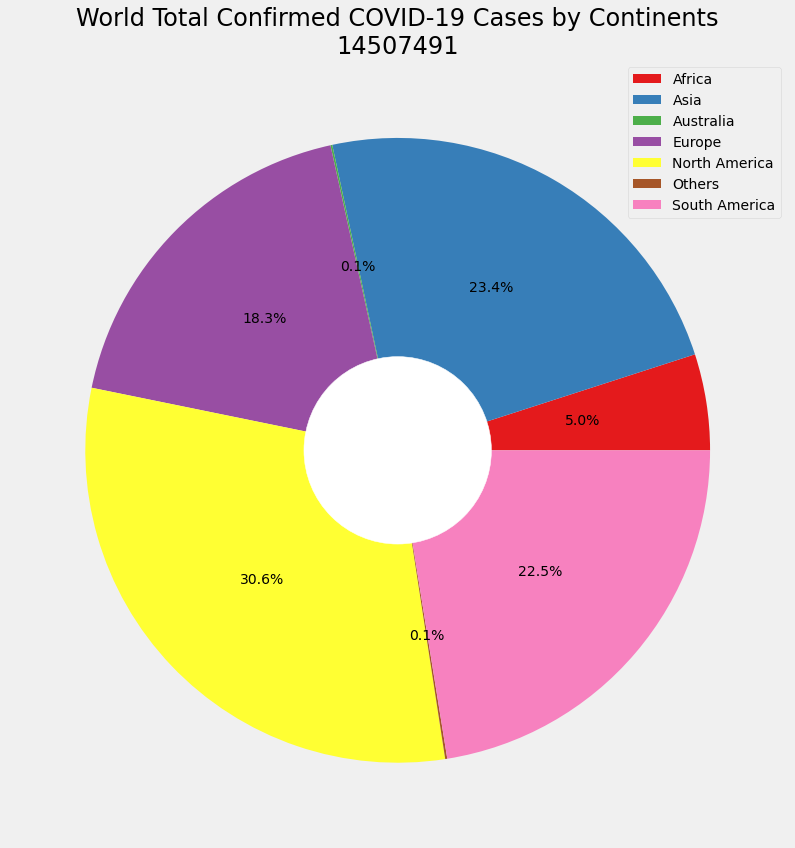

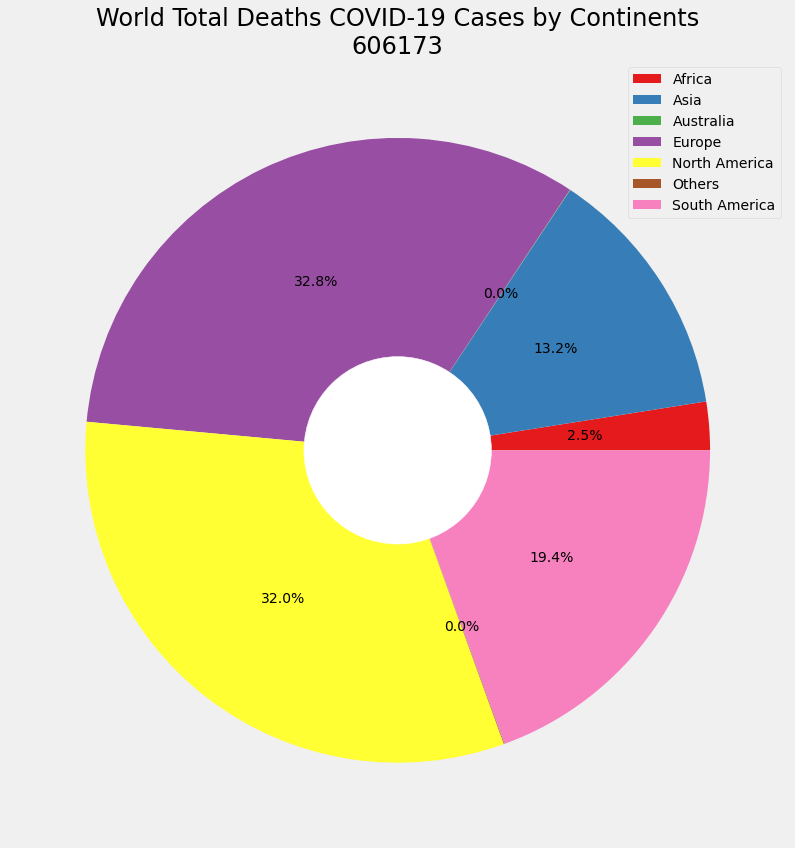

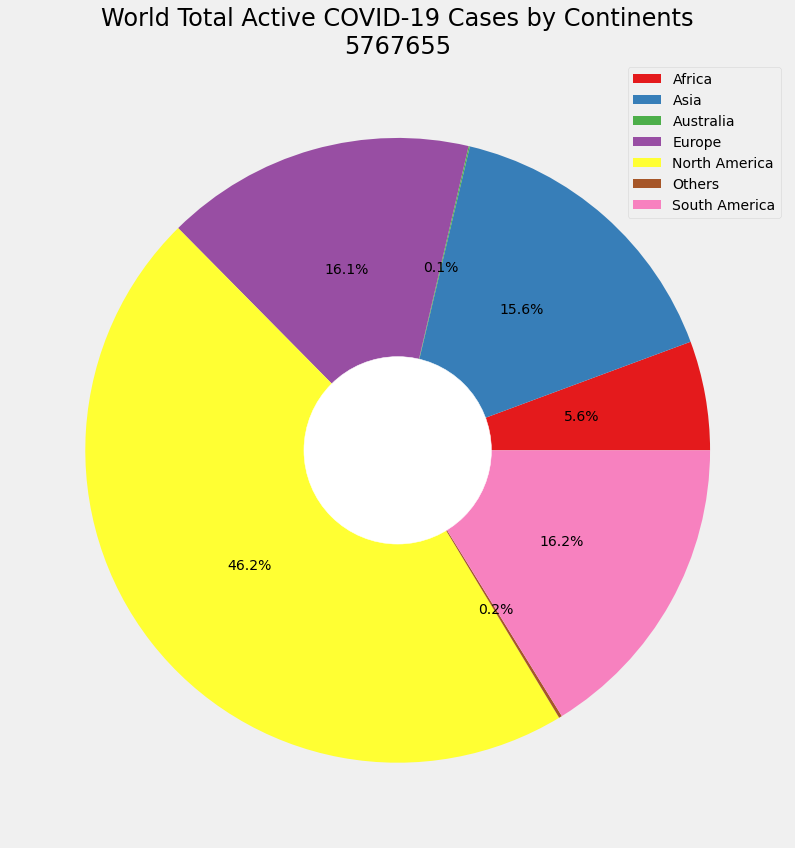

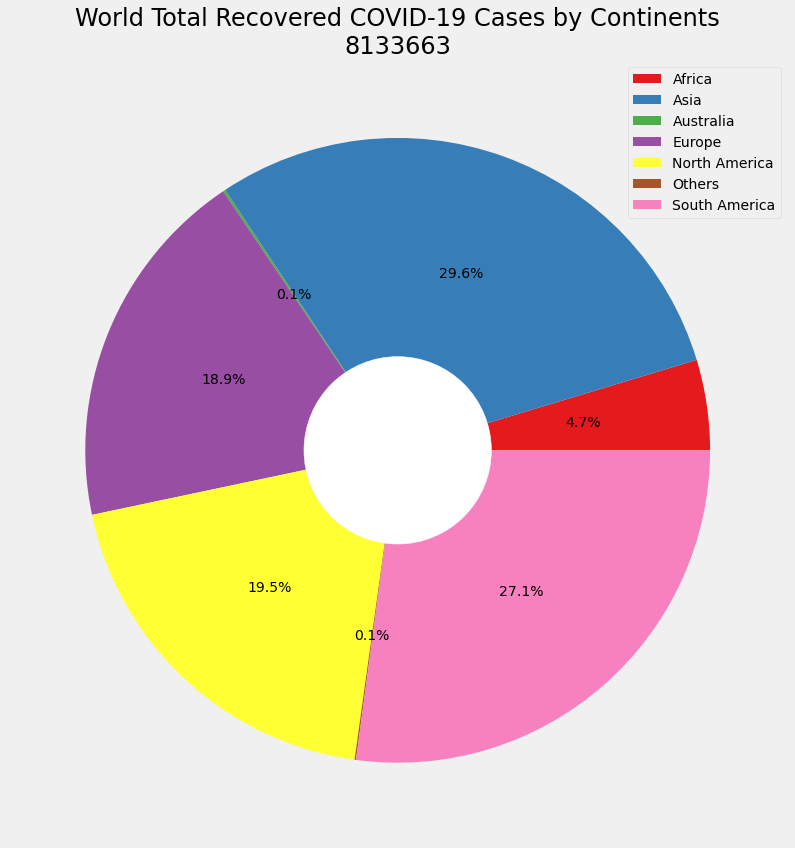

In [ ]:
#Insert your code here:


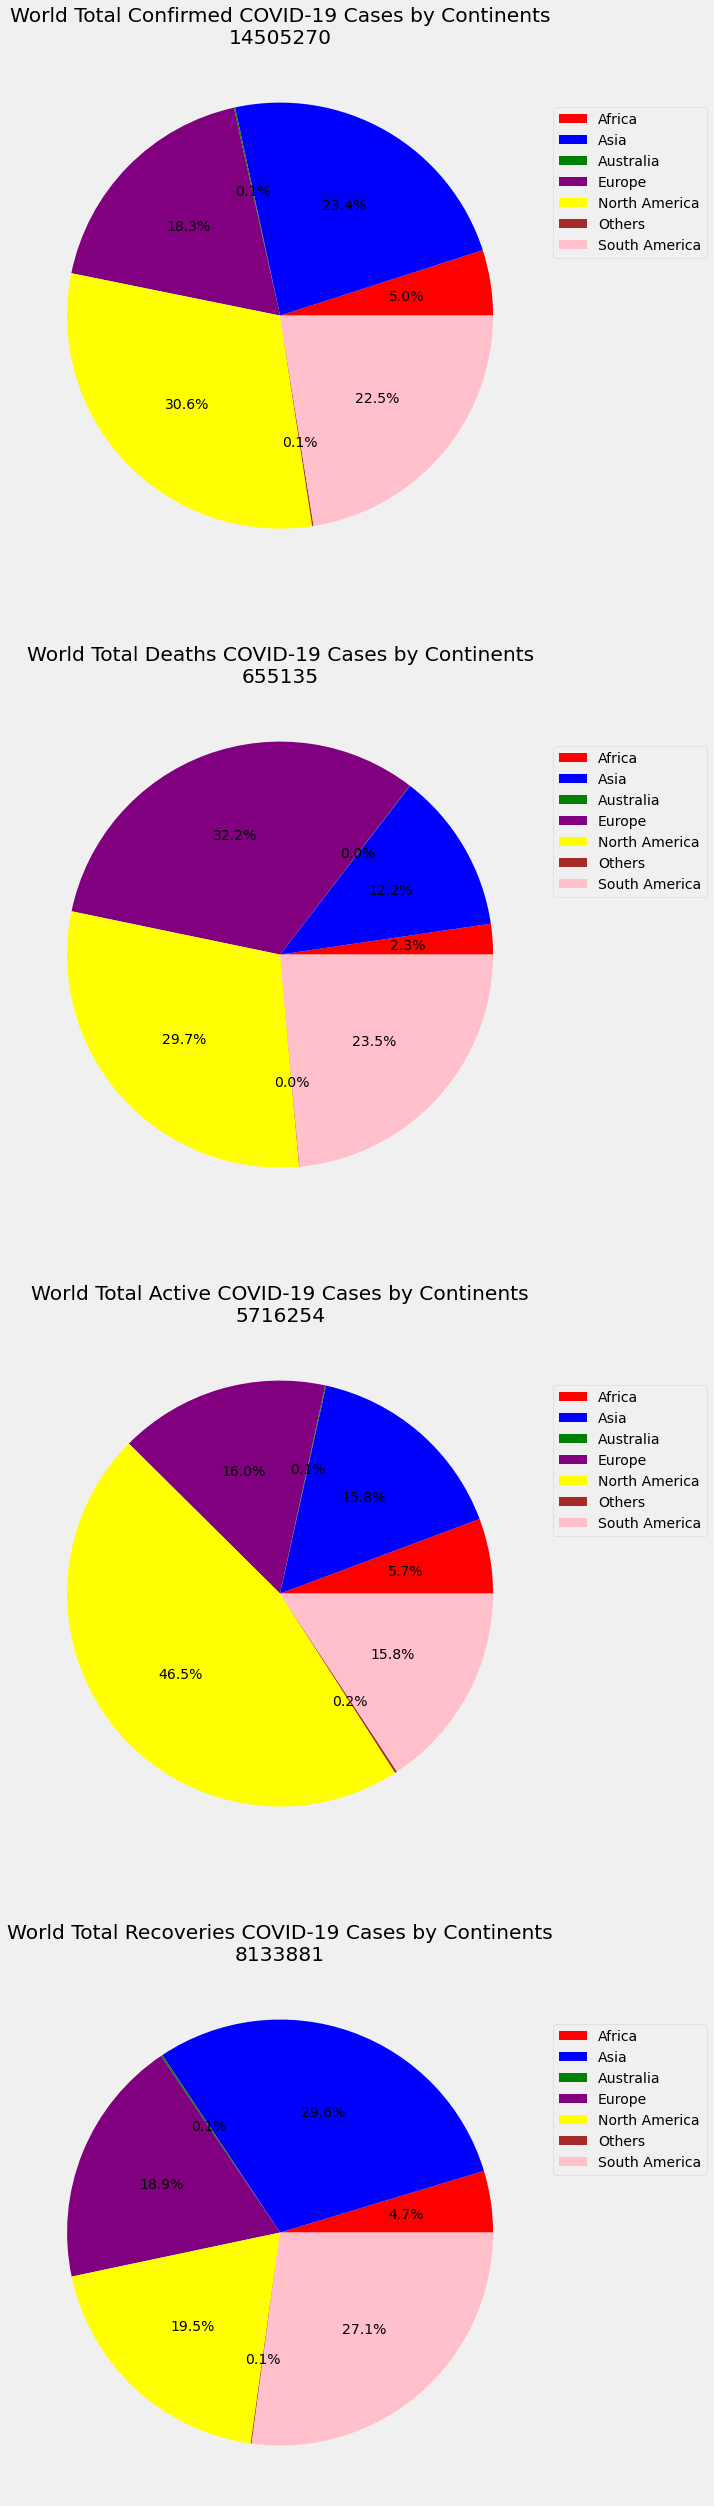

In [14]:
x = ['Confirmed', 'Deaths', 'Active', 'Recoveries']
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'brown', 'pink']
figure, axis = plt.subplots(4, 1, figsize=(10, 6*7))
labels = continent_df["continent"]

for i, arg in enumerate(x):
    data = continent_df[arg].values
    
    axis[i].pie(data, colors=colors, autopct='%1.1f%%')

    axis[i].set_title('World Total ' + arg + ' COVID-19 Cases by Continents\n' + str(continent_df[arg].sum()))
        
    axis[i].legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1.5))

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [ ]:
#Insert your code here:


In [31]:
confirmedFolium_df = countries_df.copy(deep = True)
confirmedFolium_df.reset_index(inplace = True)

confirmedFolium_df.replace('USA', "United States of America", inplace = True)
confirmedFolium_df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
confirmedFolium_df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
confirmedFolium_df.replace('Congo', "Republic of the Congo", inplace = True)
confirmedFolium_df.replace('Lao', "Laos", inplace = True)
confirmedFolium_df.replace('Syrian Arab Republic', "Syria", inplace = True)
confirmedFolium_df.replace('Serbia', "Republic of Serbia", inplace = True)
confirmedFolium_df.replace('Czechia', "Czech Republic", inplace = True)
confirmedFolium_df.replace('UAE', "United Arab Emirates", inplace = True)
confirmedFolium_df.dropna(axis = 0, inplace = True, subset = ["Lat", "Long"])

covid_folium = folium.Map()
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

color_linear = cm.LinearColormap(["green", "red"], vmin=confirmedFolium_df["Confirmed"].min(), vmax=confirmedFolium_df["Confirmed"].max())

for i in range(len(confirmedFolium_df)):
    country_name = confirmedFolium_df.at[confirmedFolium_df.index[i], "Country/Region"]
    confirmed = confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"]
    recoveries = confirmedFolium_df.at[confirmedFolium_df.index[i], "Recoveries"]
    deaths = confirmedFolium_df.at[confirmedFolium_df.index[i], "Deaths"]
    mor_rate = confirmedFolium_df.at[confirmedFolium_df.index[i], "Mortality Rate"] 
    
    html = f'''<font size="-1"><b>{country_name}</b><br>
    <font size="-2"><b>Confirmed:</b> {confirmed}<br>
    <b>Recoveries:</b> {recoveries}<br>
    <b>Deaths:</b> {deaths}<br>
    <b>Mortality Rate:</b> {mor_rate}'''

    iframe = folium.IFrame(html=html, width=300, height=100)
    
    folium.Circle(location = [confirmedFolium_df.iloc[i].Lat, confirmedFolium_df.iloc[i].Long],
                 popup = folium.Popup(iframe, min_width = 100, max_width = 2650),
                 radius = float(confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"])/2,
                 color = color_linear(confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"]),
                 weight = 1,
                 fill = True).add_to(covid_folium)
    
    
covid_folium

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [ ]:
#Insert your code here:



In [22]:
mapCountries_df = countries_df.copy(deep = True)
mapCountries_df.rename(index={'USA':'United States of America'}, inplace=True)
mapCountries_df.rename(index={"Côte d'Ivoire":'Ivory Coast'}, inplace=True)
mapCountries_df.reset_index(inplace = True)

url = (
    "https://raw.githubusercontent.com/datasets/geo-countries/master/data"
)

countries_geo = f"{url}/countries.geojson"

fig = px.choropleth_mapbox(countries_df, geojson=countries_geo,
                           featureidkey = 'properties.ADMIN',
                           locations = mapCountries_df["Country/Region"].values,
                           color=mapCountries_df["Active"].values,
                           color_continuous_scale="Spectral",
                           range_color=(0, np.log10(np.max(mapCountries_df["Active"]))),
                           zoom = 1,
                           labels={'Active':'Active Case of Covid'},
                           mapbox_style = 'open-street-map'
                          )
fig.update_traces(z=np.log10(countries_df["Active"]))
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log10



# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [ ]:
#Insert your code here:

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America    3773260  140534   
Brazil         -14.235000  -51.925300  South America    2098389   79488   
India           20.593684   78.962880           Asia    1118206   27497   
Russia          61.524010  105.318756         Europe     770311   12323   
South Africa   -30.559500   22.937500         Africa     364328    5033   
Peru            -9.190000  -75.015200  South America     353590   13187   
Mexico          23.634500 -102.552800  North America     344224   39184   
Chile          -35.675100  -71.543000  South America     330930    8503   
United Kingdom  24.548173  -43.902242         Europe     296358   45385   
Iran            32.427908   53.688046           Asia     273788   14188   

                Recoveries   Active  Mortality Rate  
Country/Region                                       
USA                1131121  2501605            3.72  
Brazil             1459072   559829            3.79  
India               700087   390622            2.46  
Russia              549387   208601            1.60  
South Africa        191059   168236            1.38  
Peru                241955    98448            3.73  
Mexico              254941    50099           11.38  
Chile               301794    20633            2.57  
United Kingdom        1413   249560           15.31  
Iran                237788    21812            5.18

In [23]:
top10_confirmed_df = countries_df.sort_values('Confirmed', ascending = False).head(10)
print(top10_confirmed_df)

                      Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America    3767602  141197   
Brazil         -14.235000  -51.925300  South America    2101399   79578   
India           20.593684   78.962880           Asia    1118206   27497   
Russia          61.524010  105.318756         Europe     770311   12323   
South Africa   -30.559500   22.937500         Africa     364328    5033   
Peru            -9.190000  -75.015200  South America     353590   49429   
Mexico          23.634500 -102.552800  North America     344224   39184   
Chile          -35.675100  -71.543000  South America     330930    8503   
United Kingdom  55.378100   -3.436000         Europe     294792   57023   
Iran            32.427908   53.688046           Asia     273788   14188   

                Recoveries   Active  Mortality Rate  
Country/Region                               

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [ ]:
#Insert your code here:


In [24]:
fig = go.Figure(data=[
    go.Bar(name='Actives', x=top10_confirmed_df.index, y=top10_confirmed_df["Active"].values),
    go.Bar(name='Recoveries', x=top10_confirmed_df.index, y=top10_confirmed_df["Recoveries"].values),
    go.Bar(name='Deaths', x=top10_confirmed_df.index, y=top10_confirmed_df["Deaths"].values),
])
# Change the bar mode
fig.update_layout(barmode='stack')
# fig.update_yaxes(type="log")
fig.show()


# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

From data visualization on global part, the COVID 2019 epidemic in the world has not reached its peak. Because through days, the confirmed cases are increasing.

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [32]:
#19.1
continent_df.sort_values('Mortality Rate', ascending = False).head(1)

continent  Confirmed  Deaths  Recoveries  Active  Mortality Rate
3    Europe    2658403  210700     1535087  912616            7.93

In [33]:
#19.3
continent_df["Recoveries Rate"] = continent_df["Recoveries"]/continent_df["Confirmed"]
continent_df.sort_values('Recoveries Rate', ascending = False).head(1)

continent  Confirmed  Deaths  Recoveries  Active  Mortality Rate  \
2  Australia      13666     146        9927    3593            1.07   

   Recoveries Rate  
2         0.726401

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [34]:
#20.1
countries_df.sort_values('Mortality Rate', ascending = False).head()

Lat       Long continent  Confirmed  Deaths  Recoveries  \
Country/Region                                                                  
Yemen           15.552727  48.516388      Asia       1606     445         712   
MS Zaandam       0.000000   0.000000    Others          9       2           0   
United Kingdom  55.378100  -3.436000    Europe     294792   57023           0   
Netherlands     18.042500 -63.054800    Europe         79      15          63   
Belgium         50.833300   4.469936    Europe      63706    9800       17289   

                Active  Mortality Rate  
Country/Region                          
Yemen              449           27.71  
MS Zaandam           7           22.22  
United Kingdom  237769           19.34  
Netherlands          1           18.99  
Belgium          36617           15.38

In [16]:
#20.3
countries_df["Recoveries Rate"] = countries_df["Recoveries"]/countries_df["Confirmed"]*100

In [21]:
countries_df.sort_values('Recoveries Rate',ascending = False).head(5)

Lat        Long continent  Confirmed  Deaths  \
Country/Region                                                       
United Kingdom  49.372300   -2.364400    Europe          0       0   
Holy See        41.902900   12.453400    Others         12       0   
China           35.745200   95.995600      Asia         18       0   
Timor-Leste     -8.874217  125.727539    Others         24       0   
China           22.166700  113.550000      Asia         46       0   

                Recoveries  Active  Mortality Rate  Recoveries Rate  
Country/Region                                                       
United Kingdom         529    -529             0.0              inf  
Holy See                12       0             0.0            100.0  
China                   18       0             0.0            100.0  
Timor-Leste             24       0             0.0            100.0  
China                   46       0             0.0            100.0

# Problem 21
**USA dataset**

In [27]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [28]:
#Insert your code here:
state_grouped = us_medical_data.groupby('Province_State')
state_totals = state_grouped.sum()
state_totals.dropna(inplace=True)

# Calculate death rate, spread rate, and recovery rate for each state
death_rate = state_totals['Deaths']/ state_totals['Confirmed']
spread_rate = state_totals['Confirmed'] / state_totals['Active']
recovery_rate = state_totals['Recovered'] / state_totals['Confirmed']

# Find states with highest death rate, spread rate, and recovery rate
highest_death_rate_state = death_rate.idxmax()
highest_spread_rate_state = spread_rate.idxmax()
highest_recovery_rate_state = recovery_rate.idxmax()

print("21.1.State with highest death rate:", highest_death_rate_state)
print("21.2.State with highest spread rate:", highest_spread_rate_state)
print("21.3.State with highest recovery rate:", highest_recovery_rate_state)


21.1.State with highest death rate: Connecticut
21.2.State with highest spread rate: California
21.3.State with highest recovery rate: Minnesota


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [29]:
#Insert your code here:
from sklearn import linear_model
us_medical_data = us_medical_data.dropna(subset=["Deaths", "Recovered", "Active"], axis=0)
top10_medical_data = us_medical_data.sort_values('Confirmed', ascending = False).head(10)

X = us_medical_data[["Deaths", "Recovered", "Active"]].values
y = us_medical_data["Confirmed"]

regr = linear_model.LinearRegression()
regr.fit(X, y) 

for i in range(len(top10_medical_data)):
    print(top10_medical_data.iloc[i].Confirmed,
          np.round(regr.predict([[top10_medical_data.iloc[i].Deaths, top10_medical_data.iloc[i].Recovered, top10_medical_data.iloc[i].Active]])[0], 0))

397649 397803.0
204710 204623.0
174766 174888.0
110137 109969.0
101455 101716.0
94439 94357.0
74775 74801.0
73267 73224.0
69904 70105.0
66327 66358.0
